In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.INFO)

In [3]:
from src.parameters import ANIMALS, SAMPLING_FREQUENCY

In [6]:
data = xr.open_mfdataset('../Processed-Data/HPa_02_04.nc', group='ripple/spike_spike_coherence')
data

<xarray.Dataset>
Dimensions:               (frequency: 188, neuron1: 29, neuron2: 29, time: 2)
Coordinates:
  * time                  (time) float64 0.125 0.375
  * frequency             (frequency) float64 0.0 4.0 8.0 12.0 16.0 20.0 ...
  * neuron1               (neuron1) object 'HPa_02_04_001_001' ...
  * neuron2               (neuron2) object 'HPa_02_04_001_001' ...
Data variables:
    coherence_magnitude   (time, frequency, neuron1, neuron2) float64 dask.array<shape=(2, 188, 29, 29), chunksize=(2, 188, 29, 29)>
    coherence_difference  (frequency, neuron1, neuron2) float64 dask.array<shape=(188, 29, 29), chunksize=(188, 29, 29)>

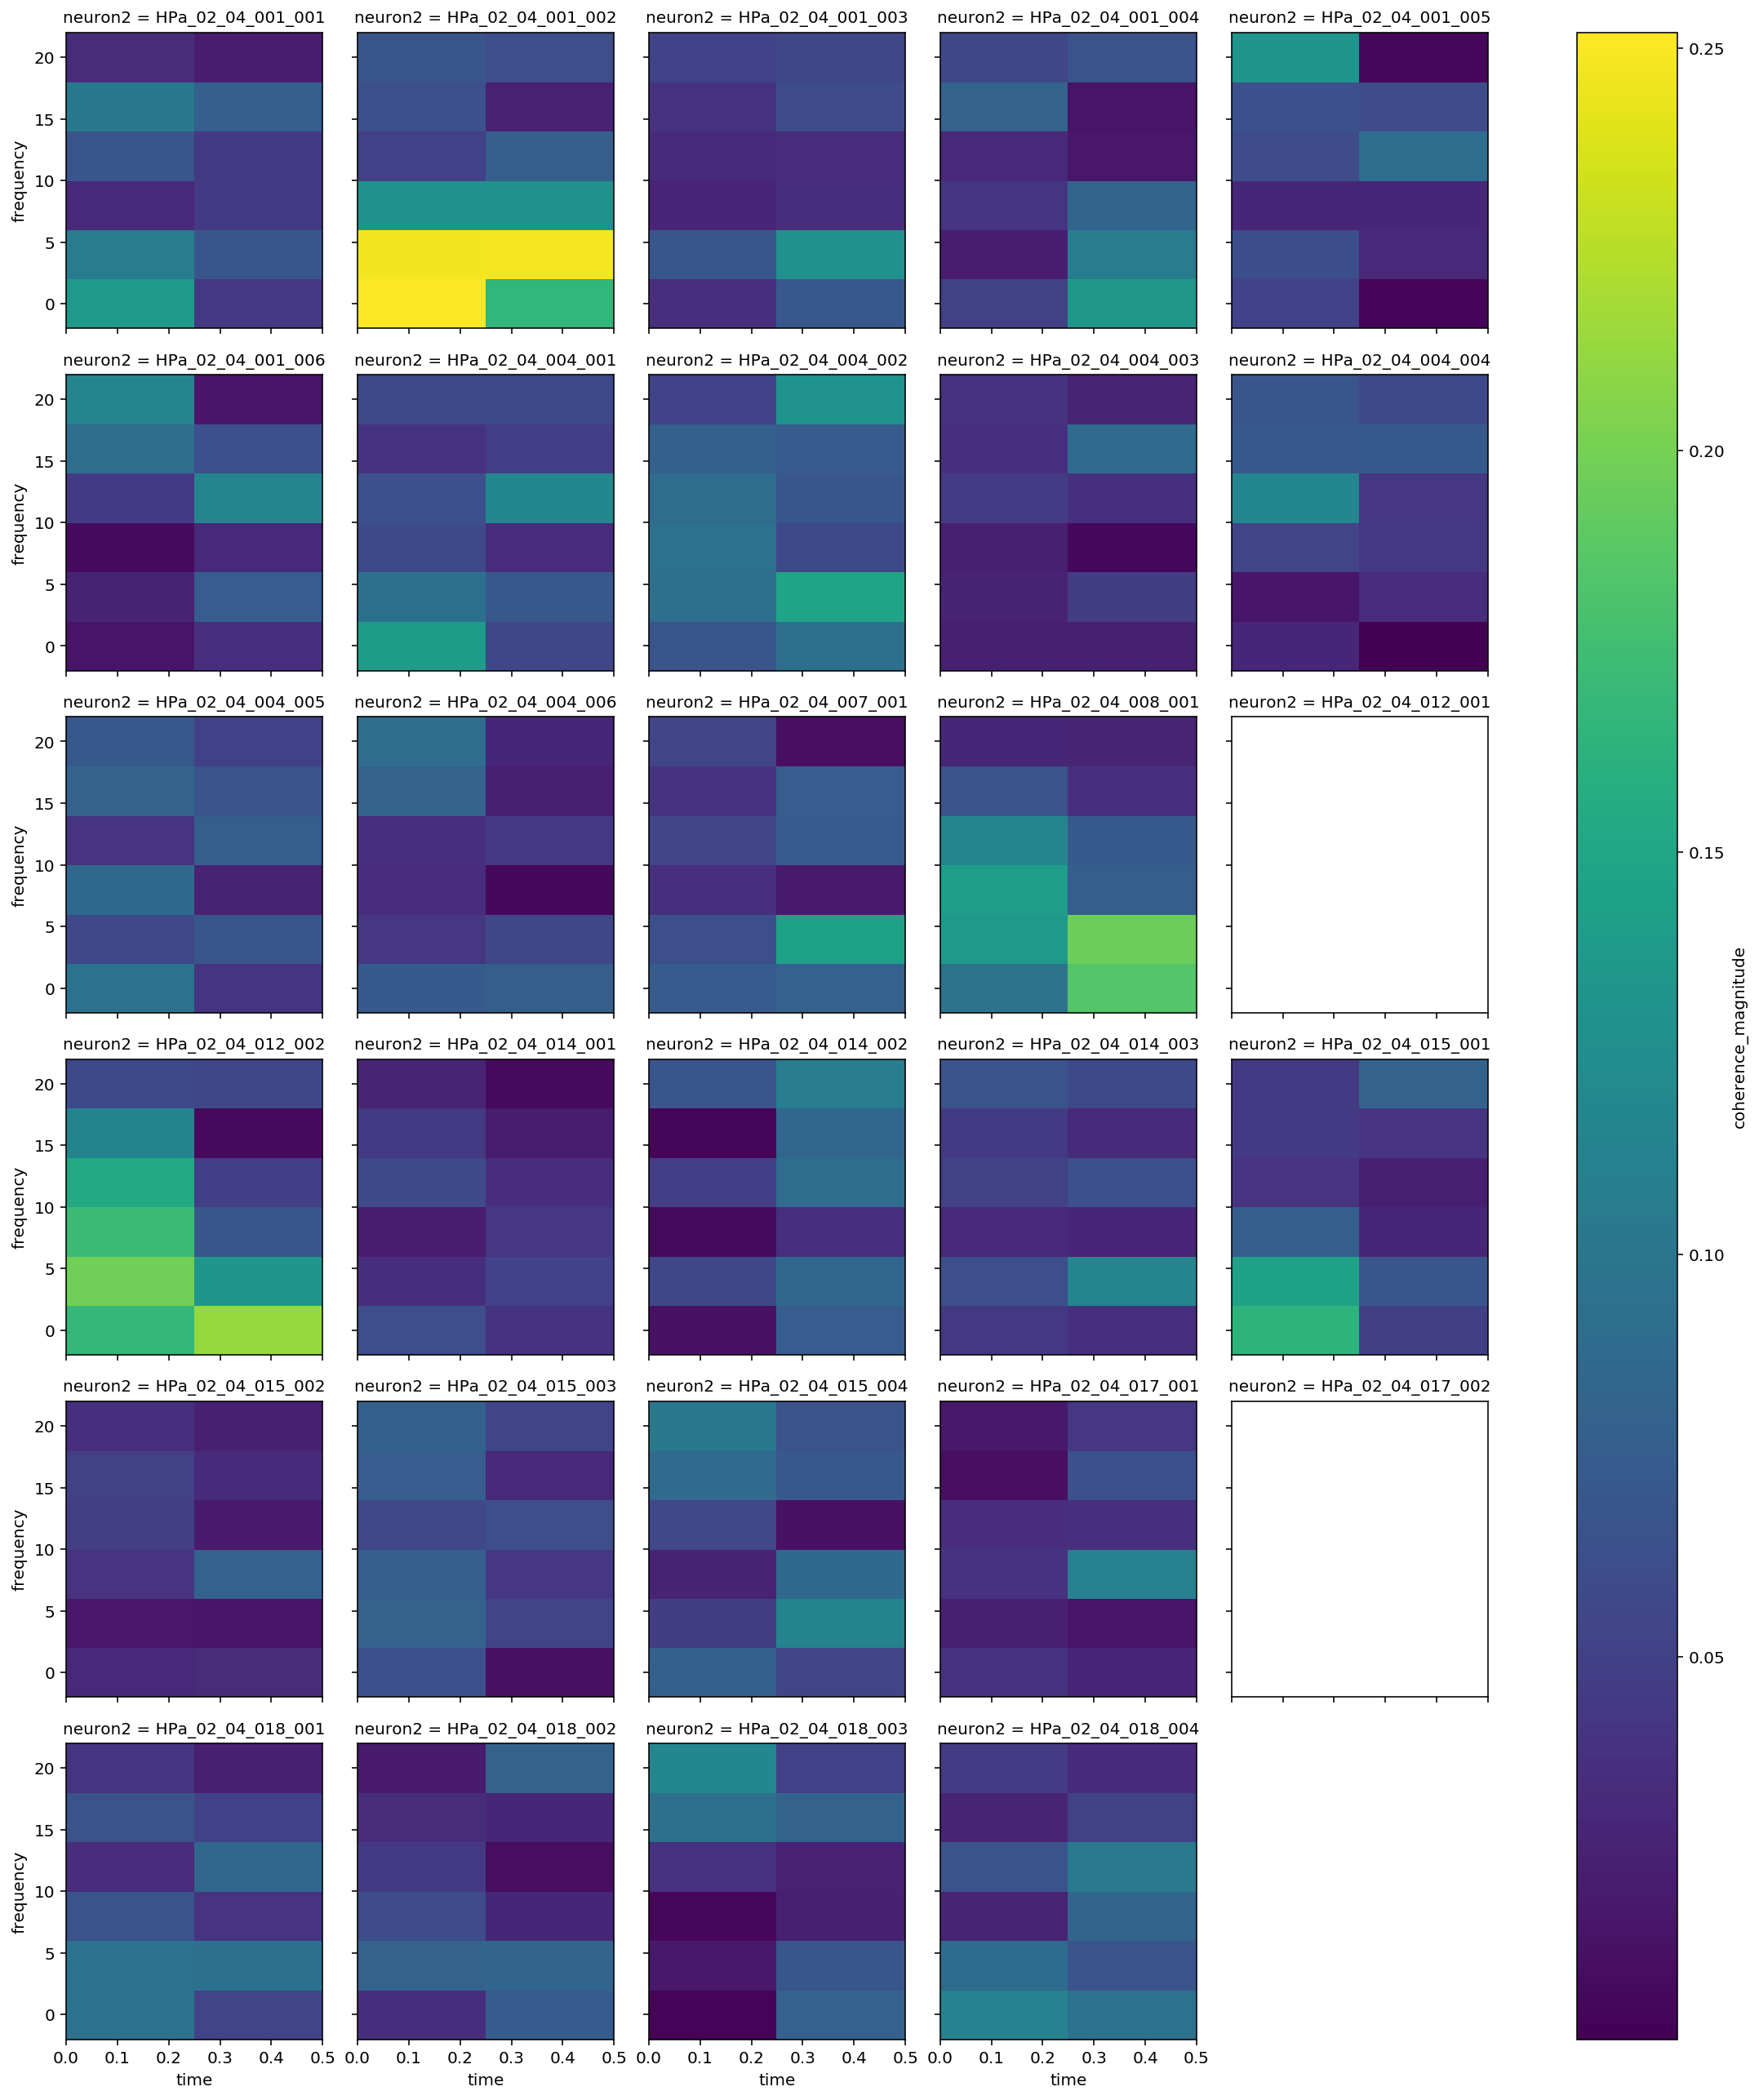

In [16]:
data.sel(neuron1='HPa_02_04_017_002',
         frequency=slice(0, 20)).coherence_magnitude.plot(x='time', y='frequency', col='neuron2', col_wrap=5)

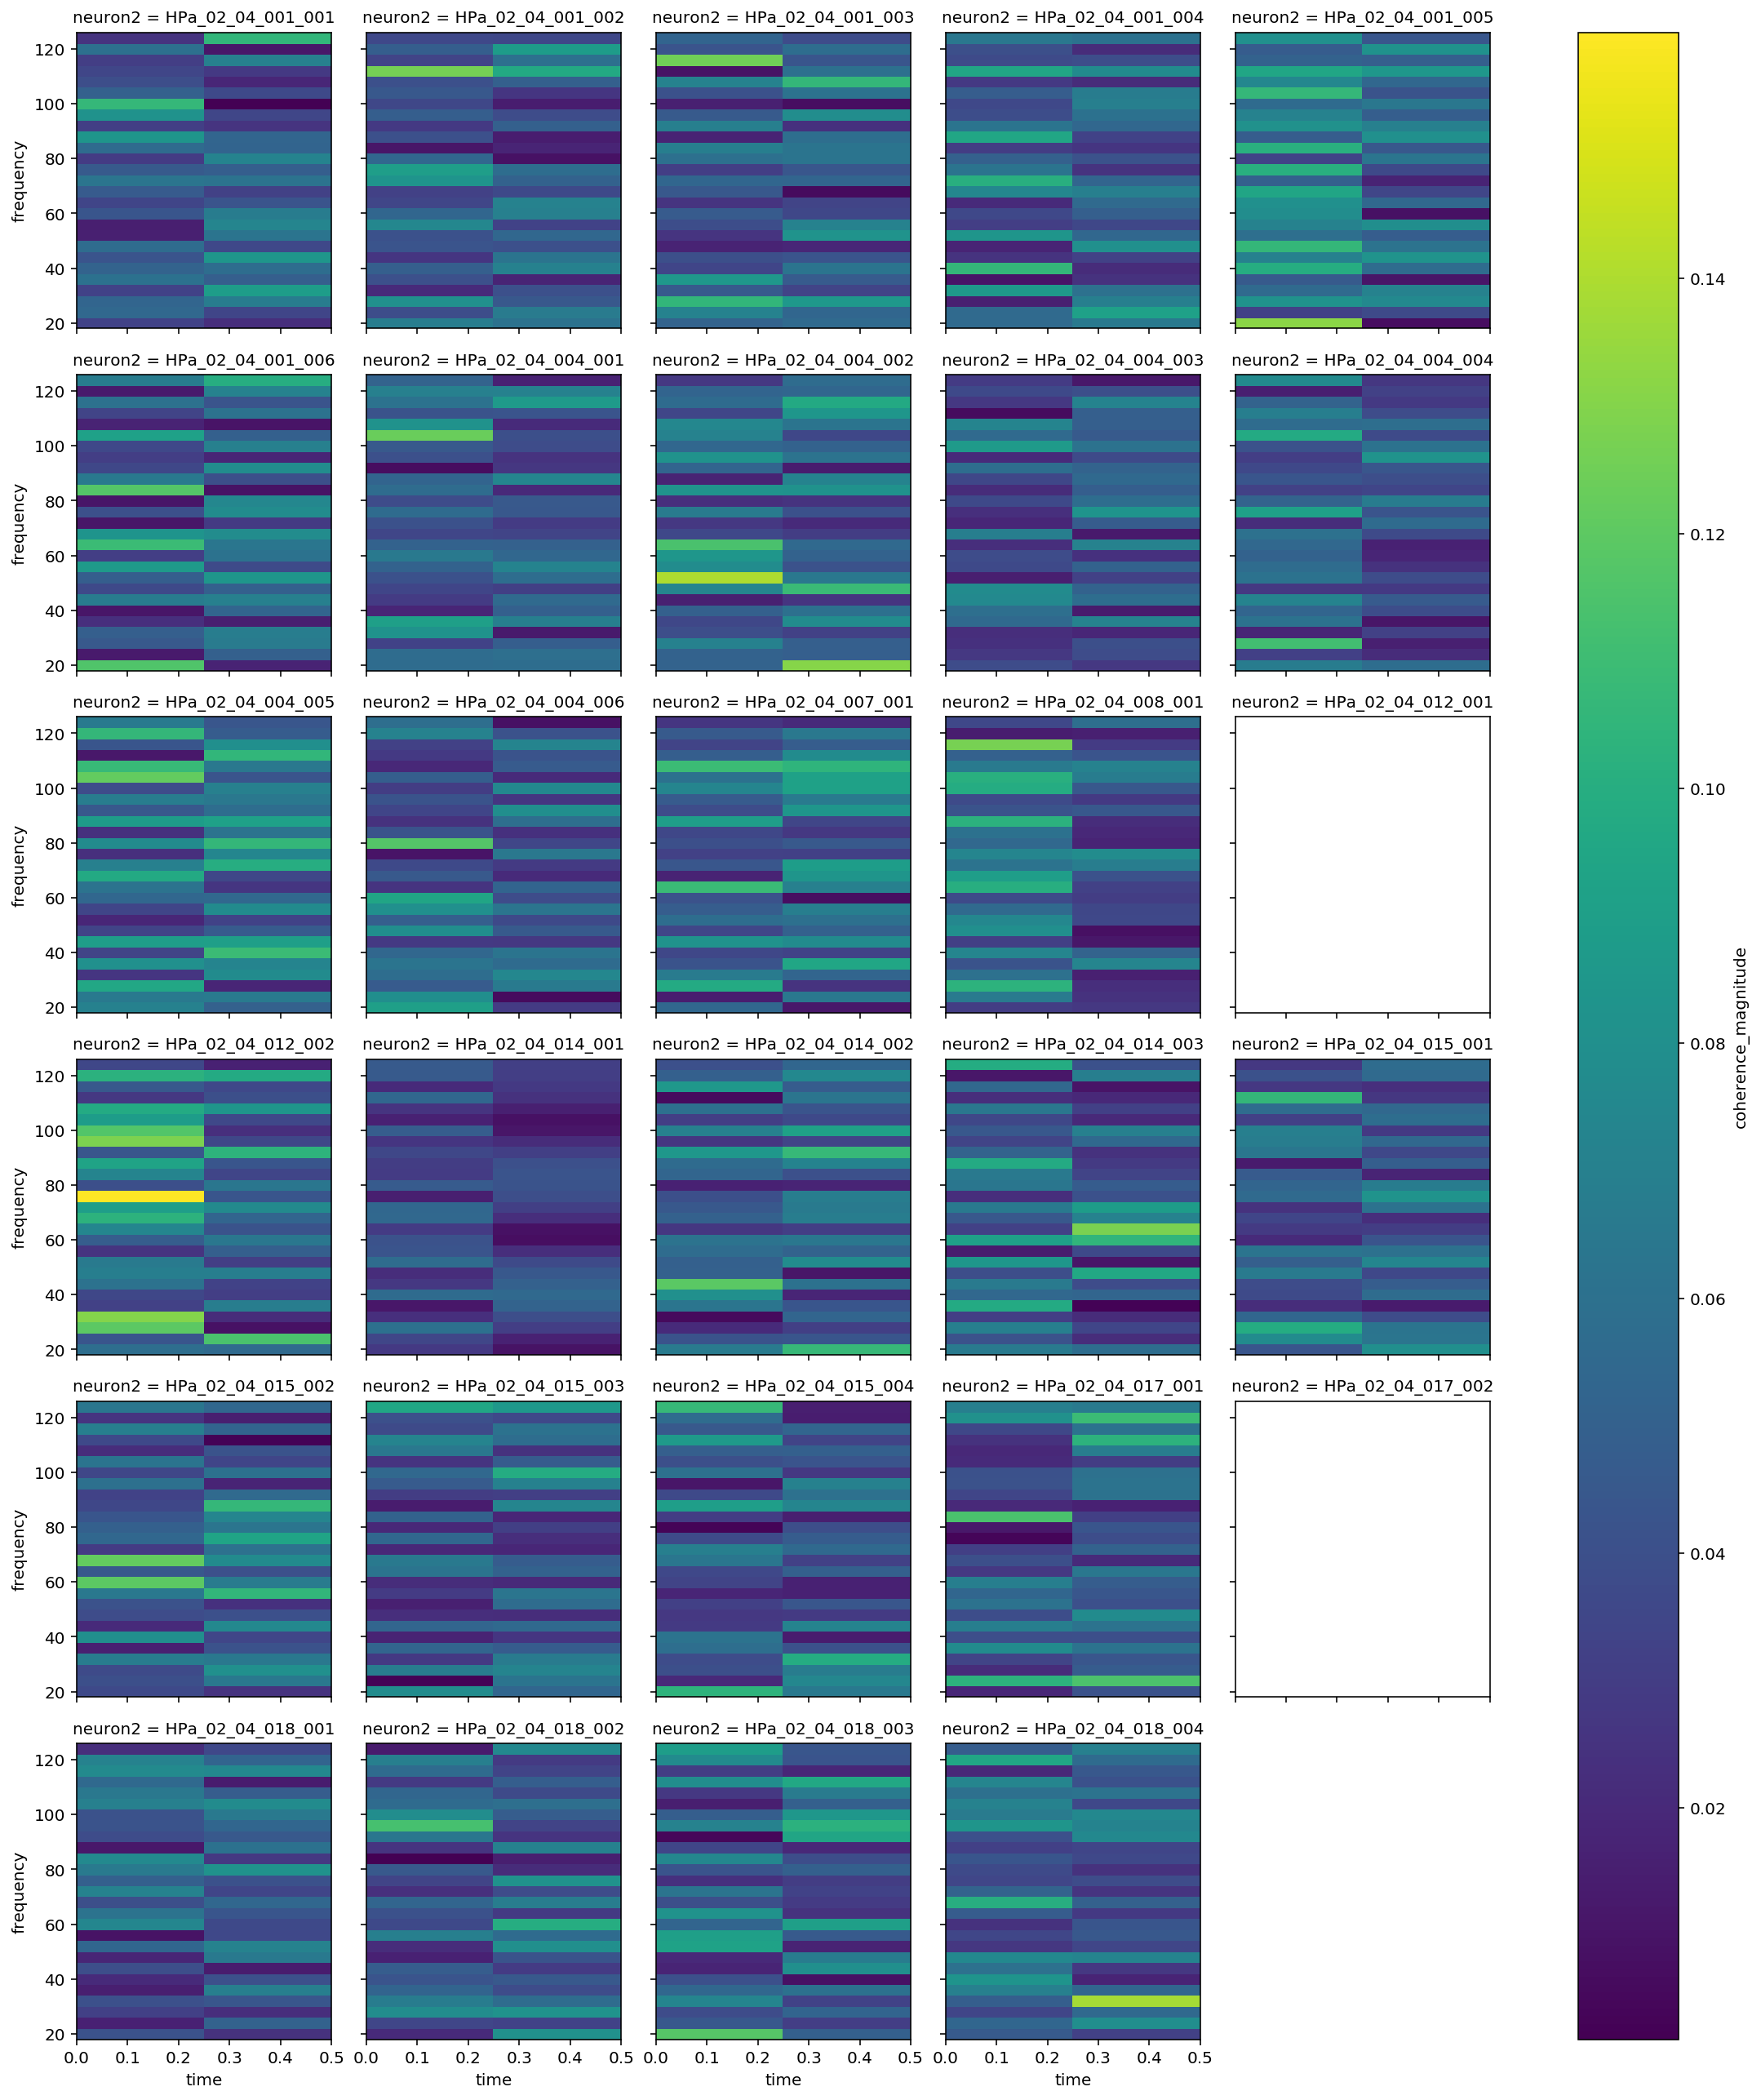

In [17]:
data.sel(neuron1='HPa_02_04_017_002',
         frequency=slice(20, 125)).coherence_magnitude.plot(x='time', y='frequency', col='neuron2', col_wrap=5)

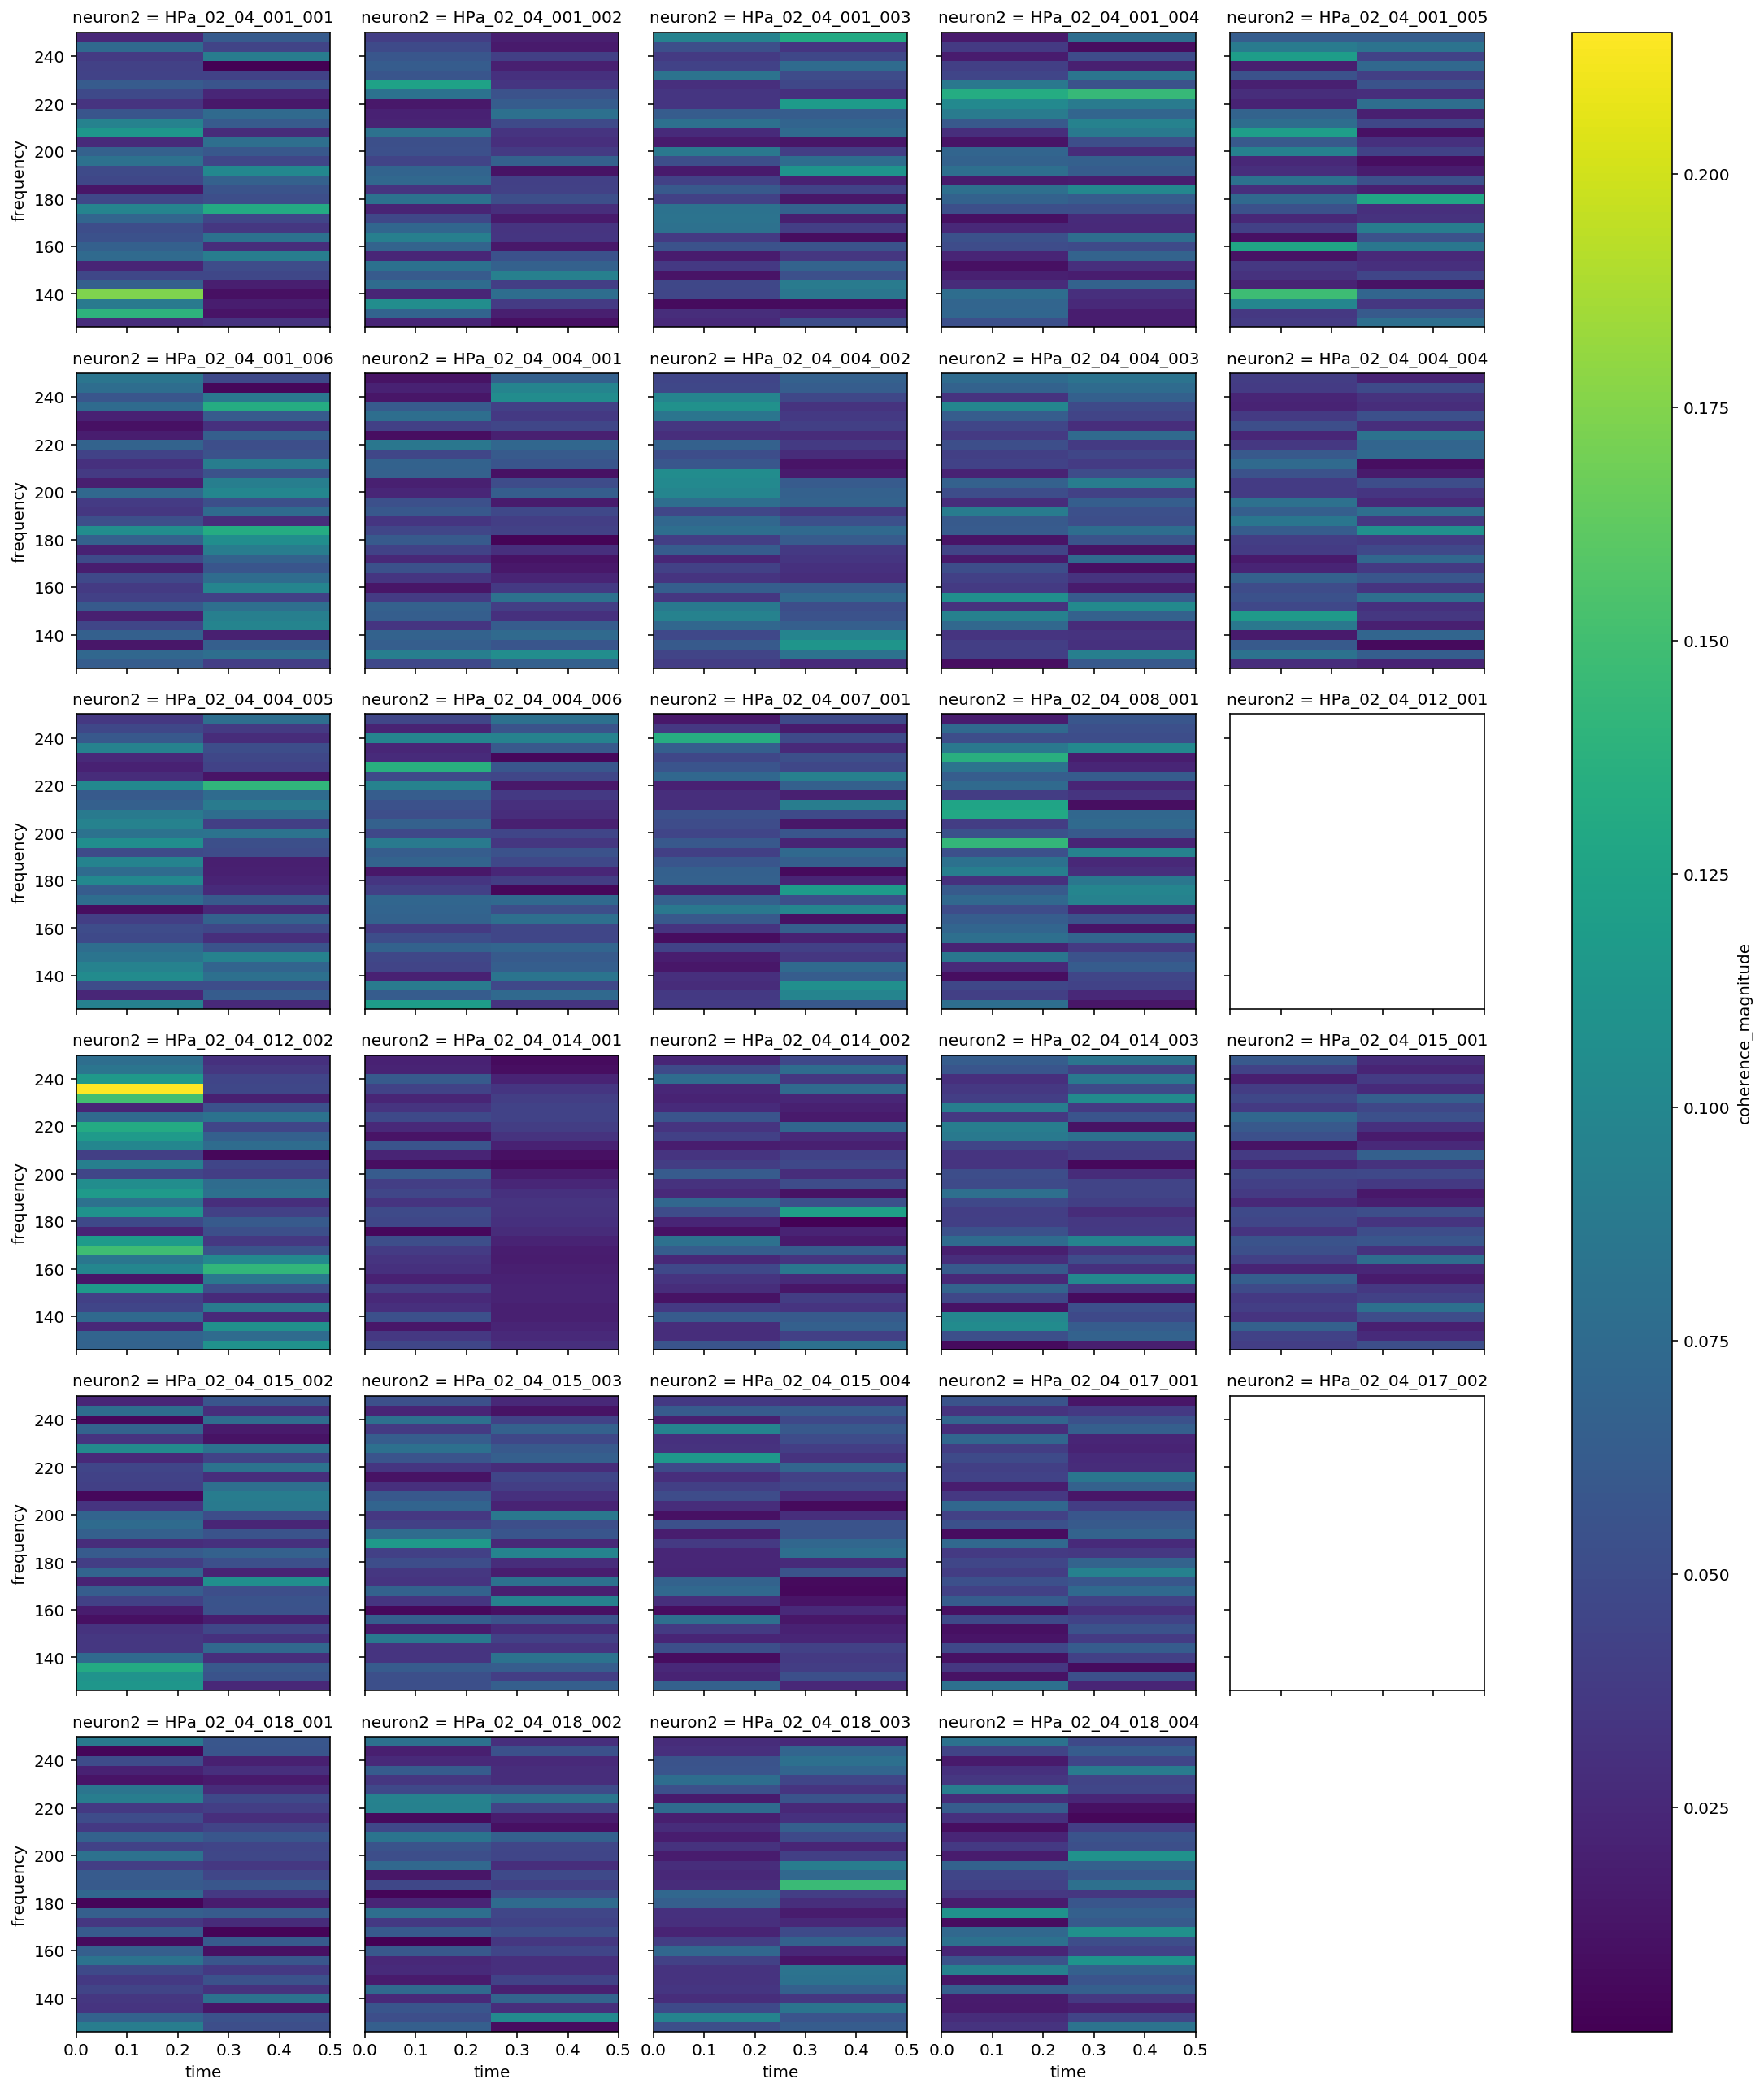

In [18]:
data.sel(neuron1='HPa_02_04_017_002',
         frequency=slice(125, 250)).coherence_magnitude.plot(x='time', y='frequency', col='neuron2', col_wrap=5)

In [21]:
data = xr.open_mfdataset('../Processed-Data/HPb_07_02.nc', group='ripple/spike_spike_coherence')
data

<xarray.Dataset>
Dimensions:               (frequency: 188, neuron1: 21, neuron2: 21, time: 2)
Coordinates:
  * time                  (time) float64 0.125 0.375
  * frequency             (frequency) float64 0.0 4.0 8.0 12.0 16.0 20.0 ...
  * neuron1               (neuron1) object 'HPb_07_02_001_001' ...
  * neuron2               (neuron2) object 'HPb_07_02_001_001' ...
Data variables:
    coherence_magnitude   (time, frequency, neuron1, neuron2) float64 dask.array<shape=(2, 188, 21, 21), chunksize=(2, 188, 21, 21)>
    coherence_difference  (frequency, neuron1, neuron2) float64 dask.array<shape=(188, 21, 21), chunksize=(188, 21, 21)>

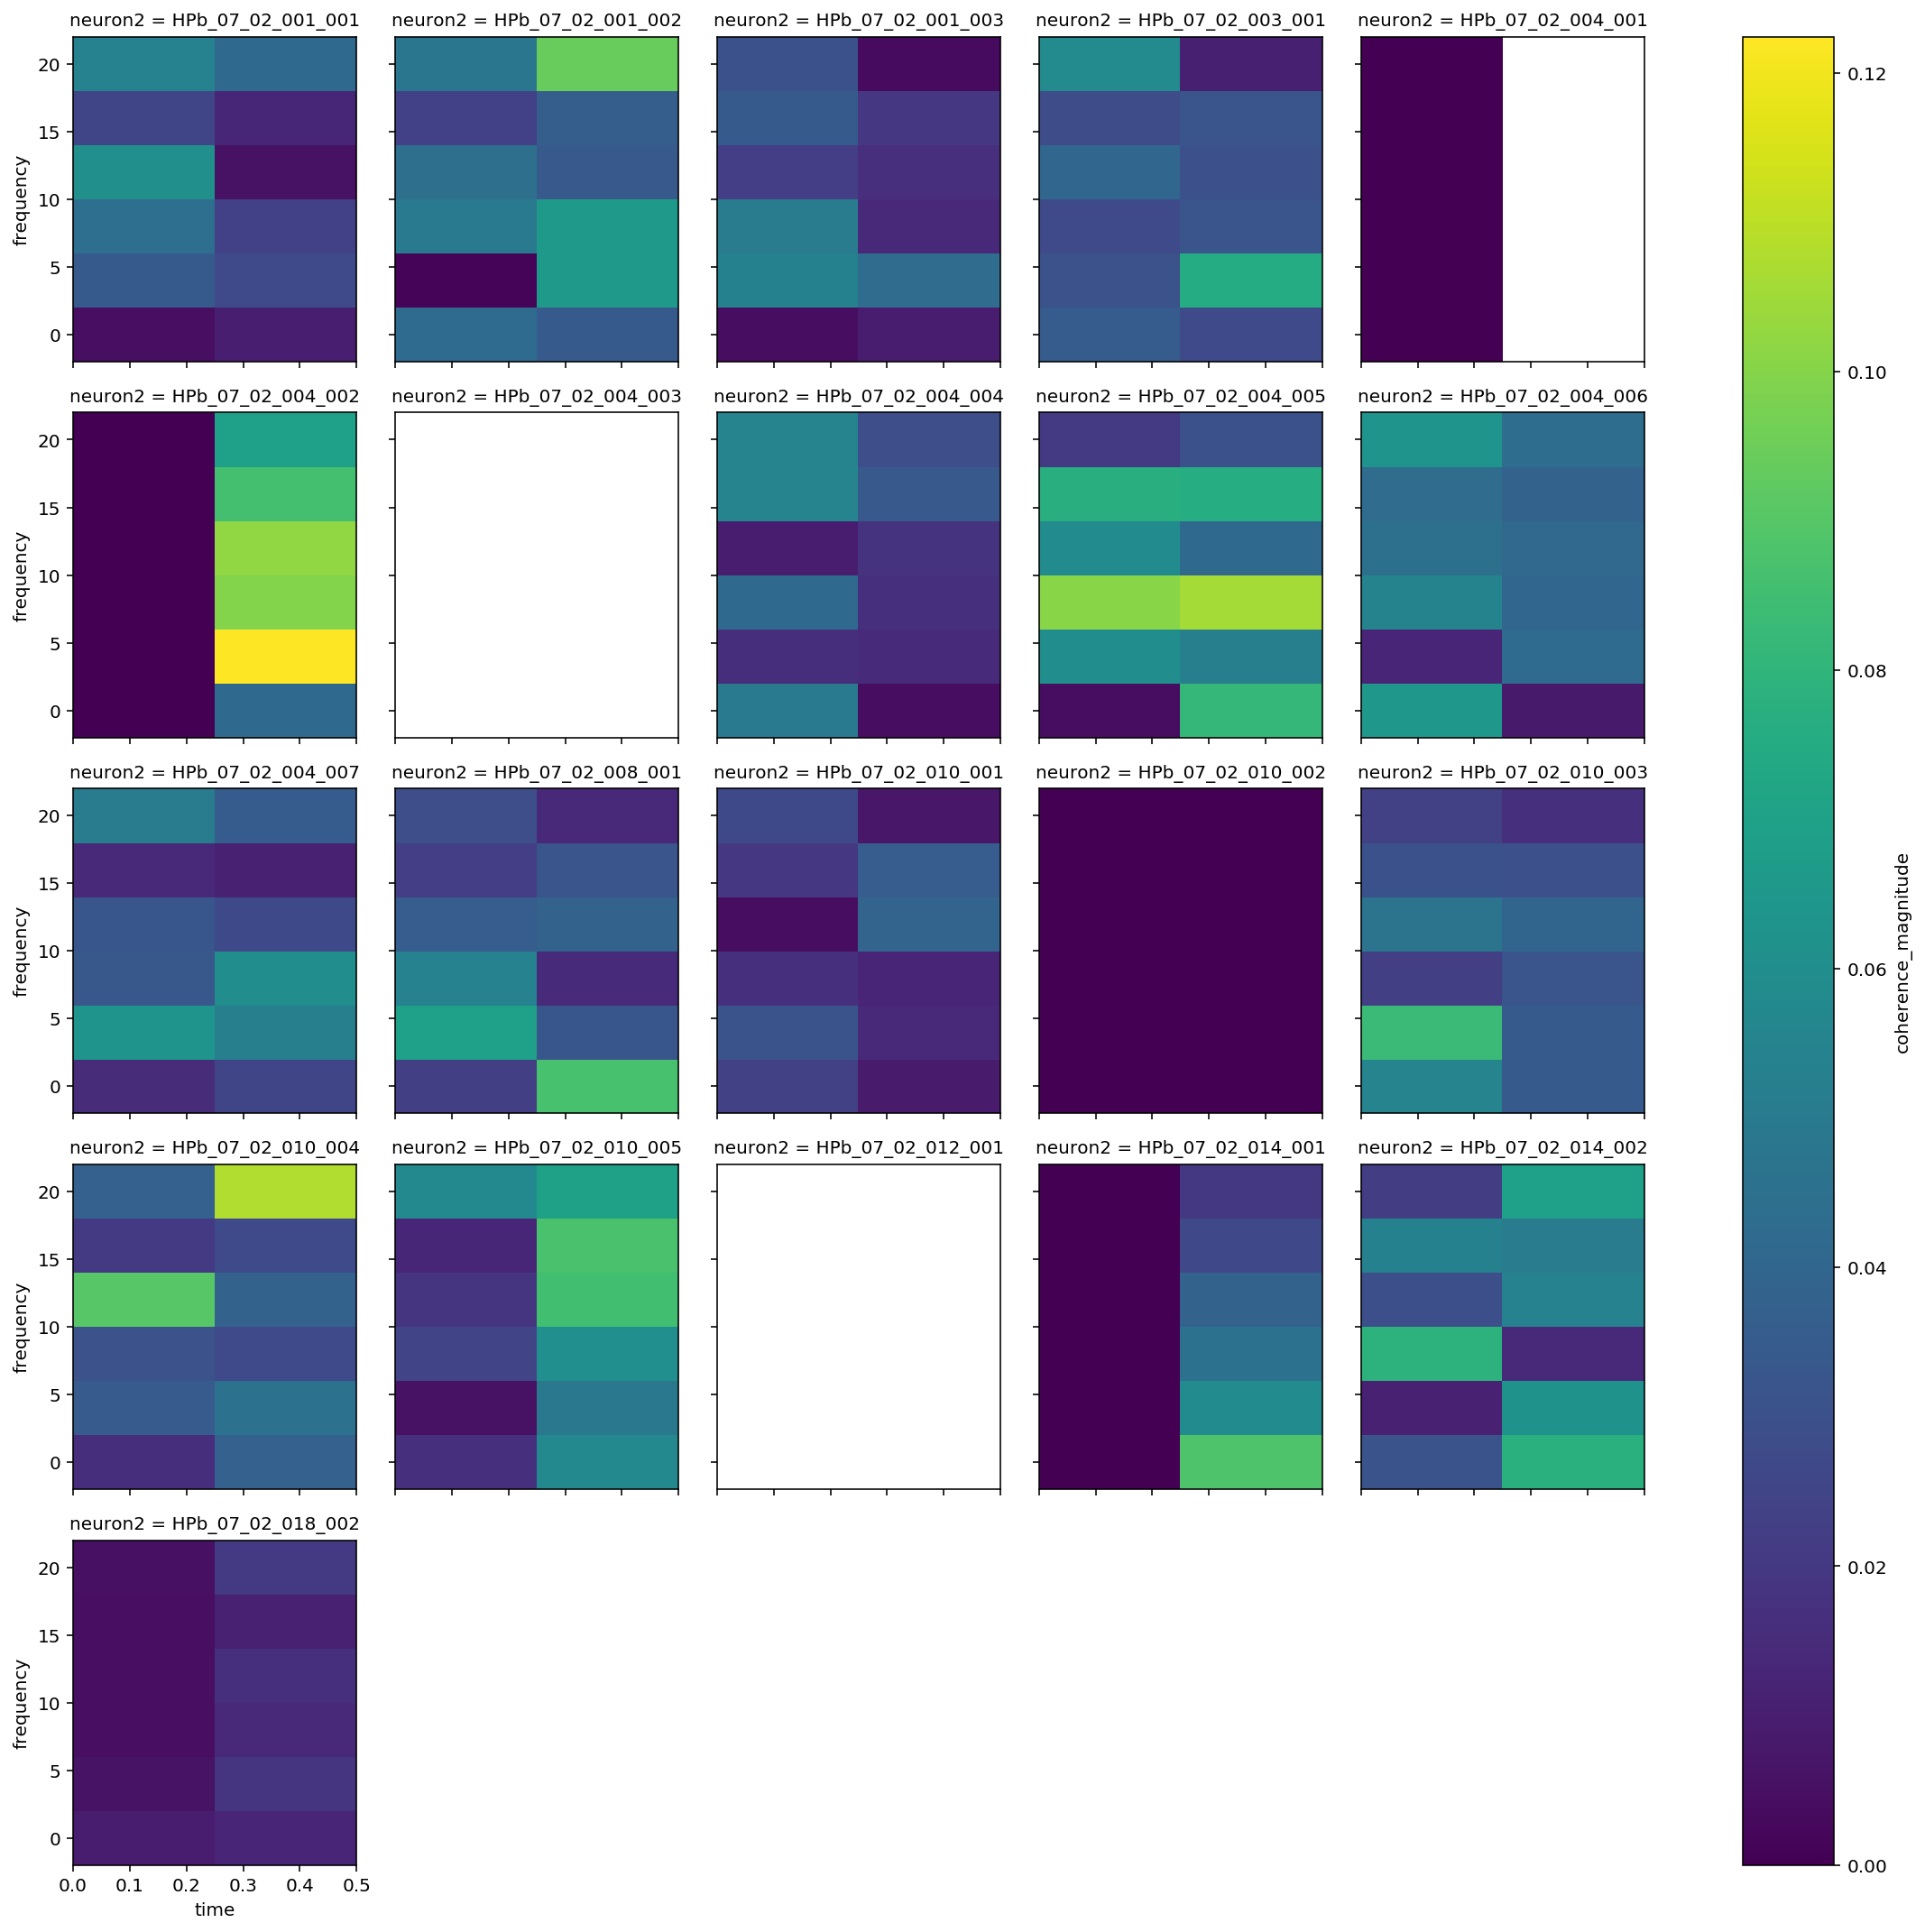

In [22]:
data.sel(neuron1='HPb_07_02_012_001',
         frequency=slice(0, 20)).coherence_magnitude.plot(x='time', y='frequency', col='neuron2', col_wrap=5)

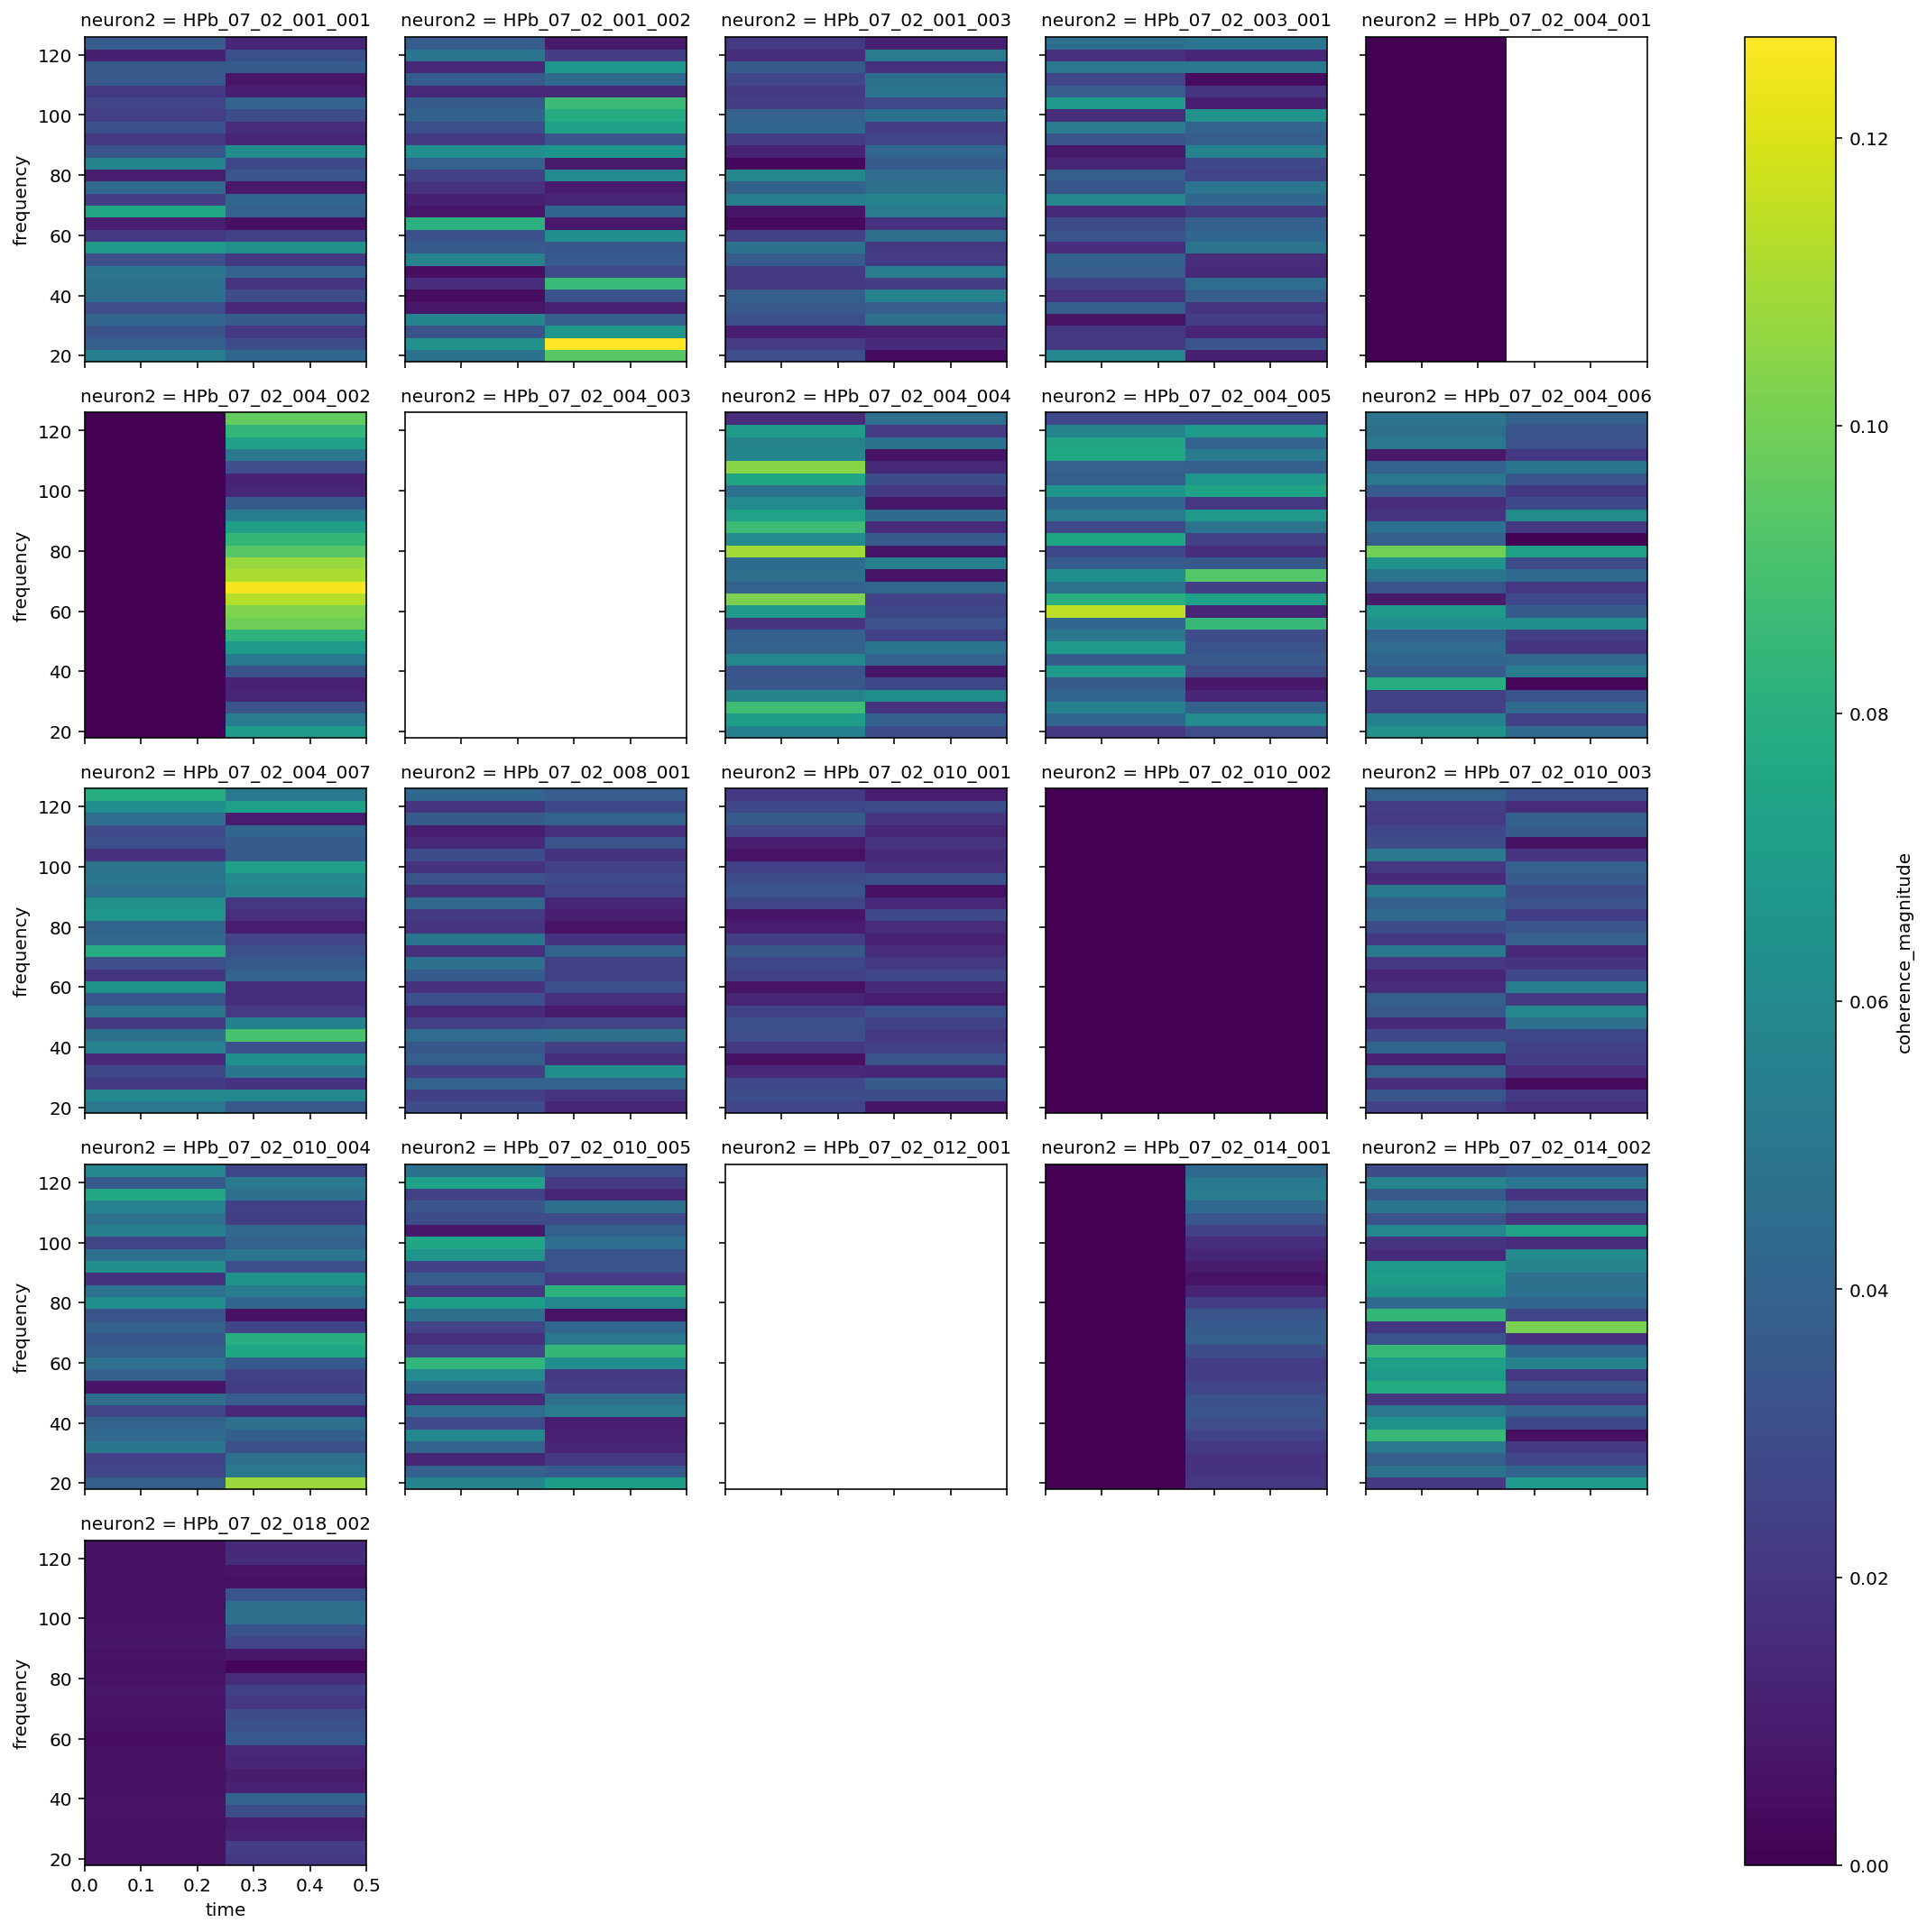

In [23]:
data.sel(neuron1='HPb_07_02_012_001',
         frequency=slice(20, 125)).coherence_magnitude.plot(x='time', y='frequency', col='neuron2', col_wrap=5)

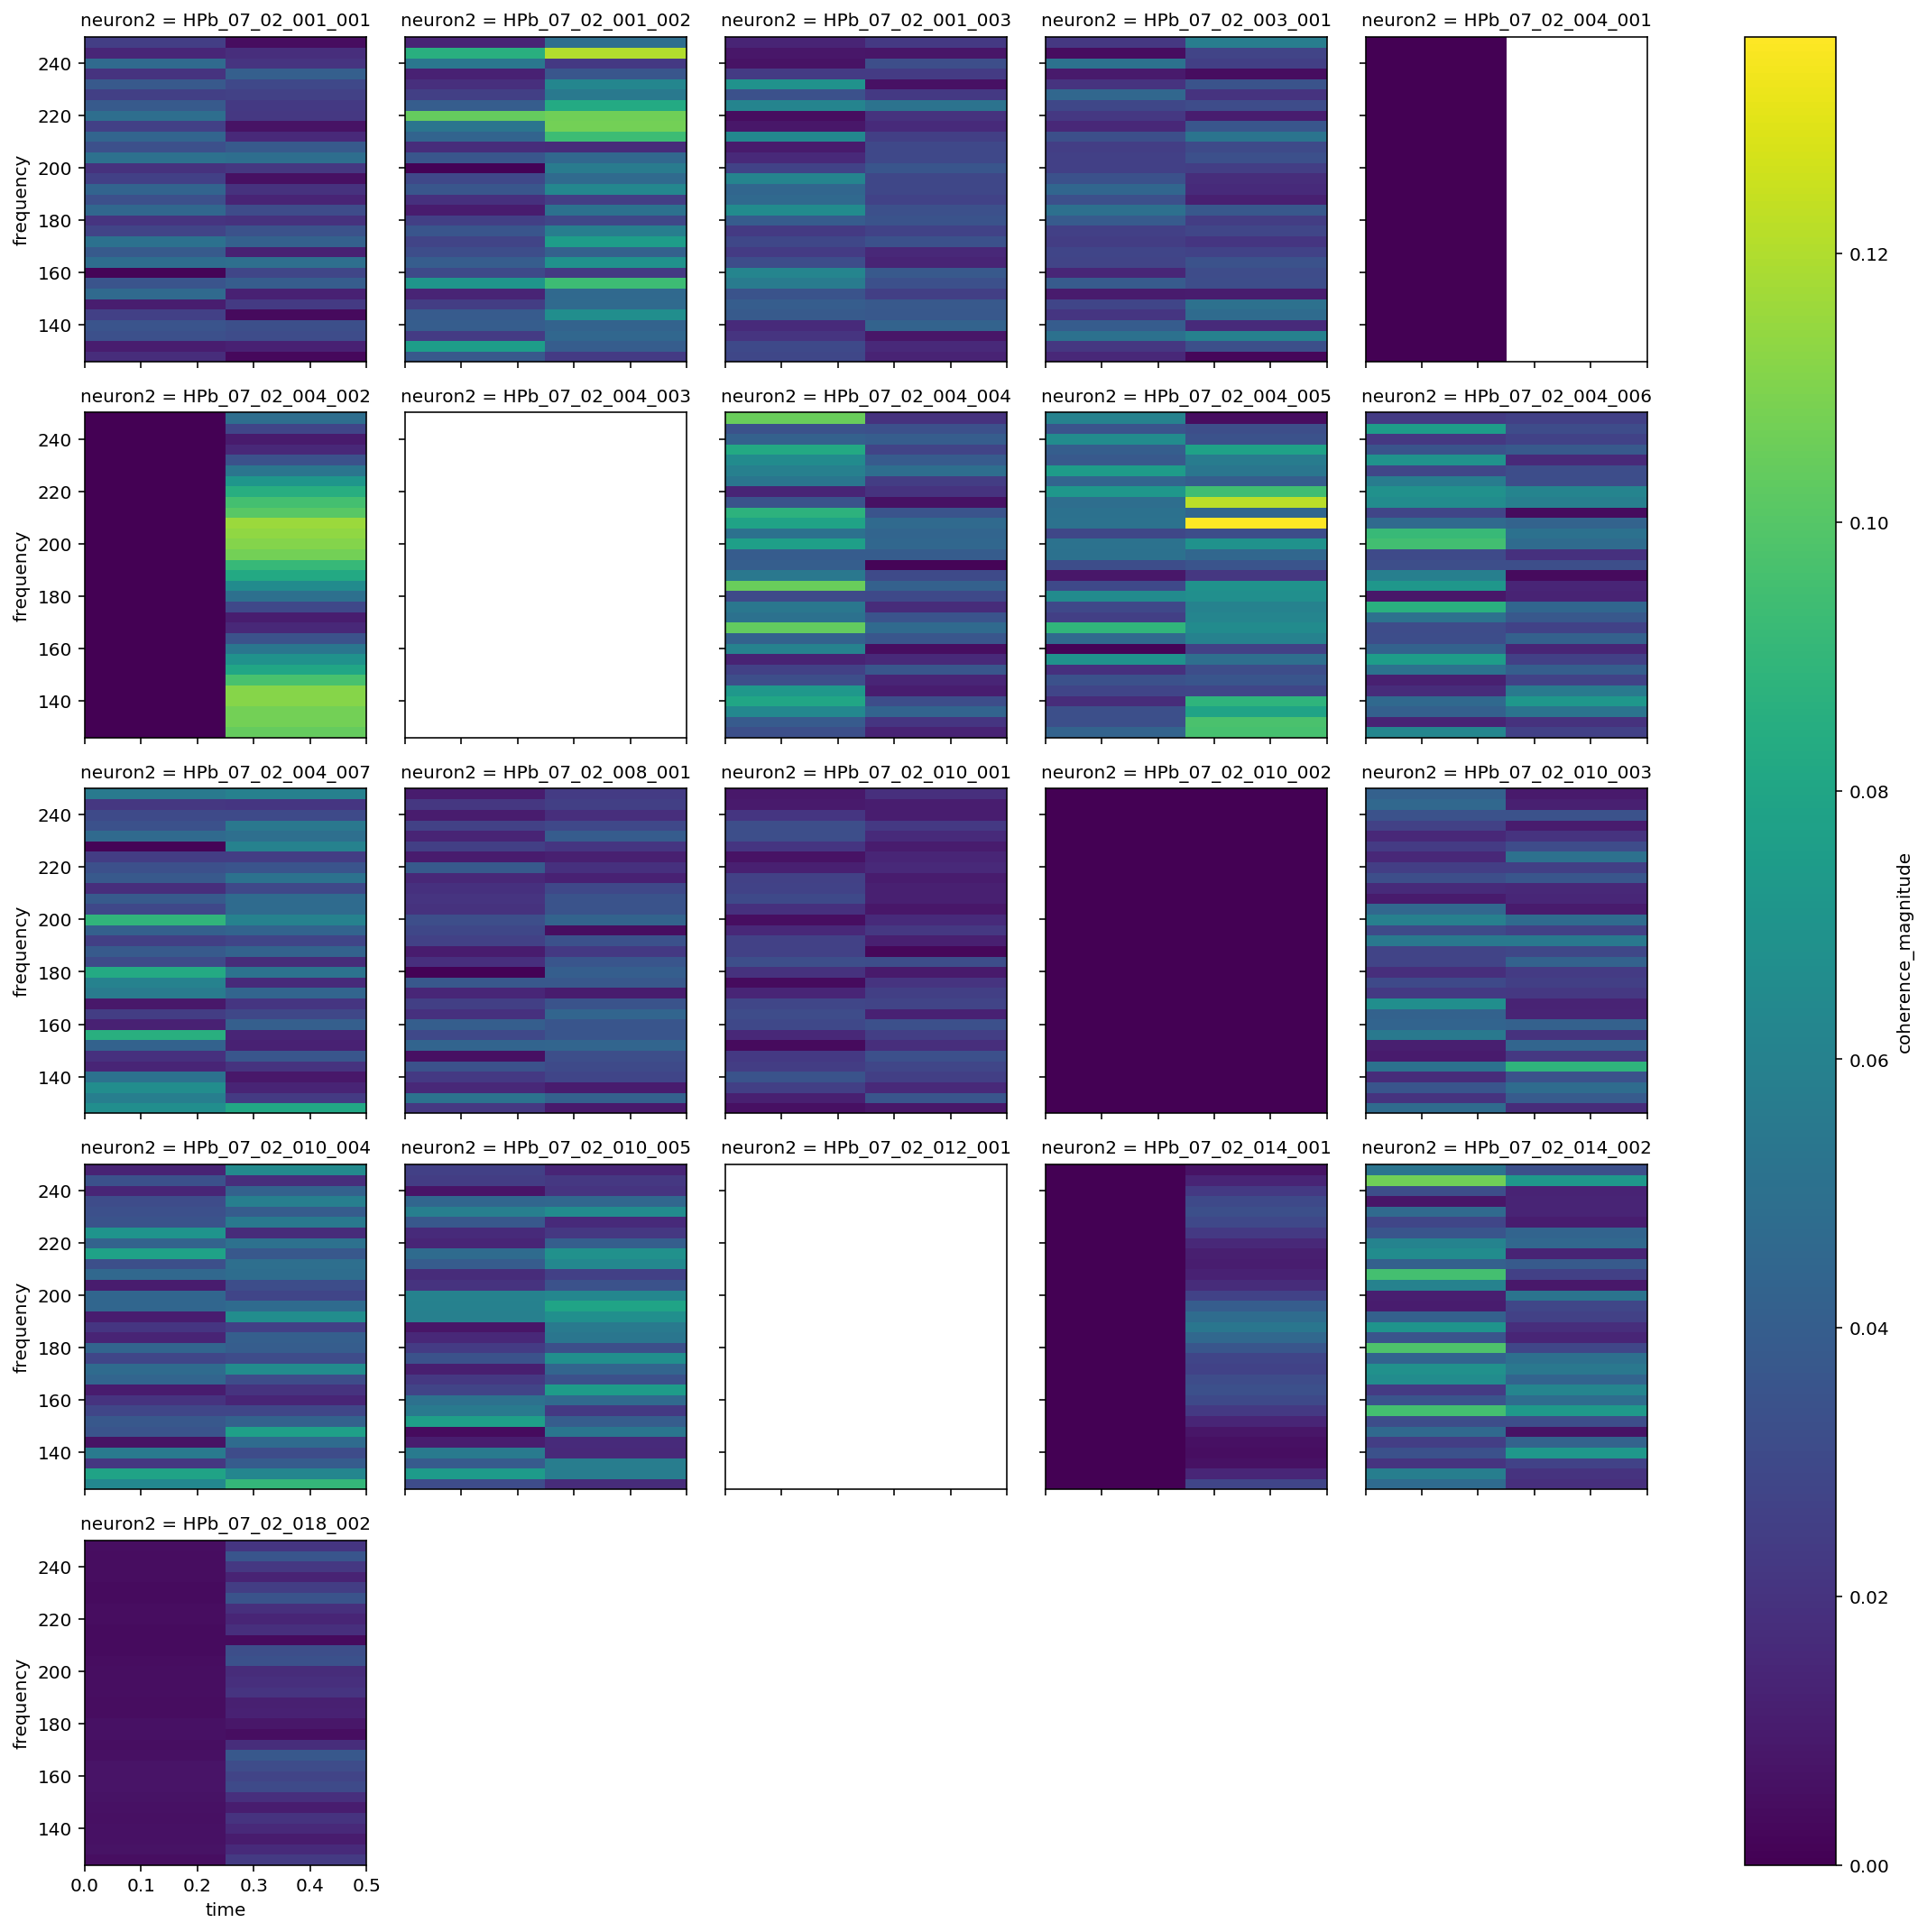

In [24]:
data.sel(neuron1='HPb_07_02_012_001',
         frequency=slice(125, 250)).coherence_magnitude.plot(x='time', y='frequency', col='neuron2', col_wrap=5)

In [25]:
data = xr.open_mfdataset('../Processed-Data/HPb_08_02.nc', group='ripple/spike_spike_coherence')
data

<xarray.Dataset>
Dimensions:               (frequency: 188, neuron1: 22, neuron2: 22, time: 2)
Coordinates:
  * time                  (time) float64 0.125 0.375
  * frequency             (frequency) float64 0.0 4.0 8.0 12.0 16.0 20.0 ...
  * neuron1               (neuron1) object 'HPb_08_02_001_001' ...
  * neuron2               (neuron2) object 'HPb_08_02_001_001' ...
Data variables:
    coherence_magnitude   (time, frequency, neuron1, neuron2) float64 dask.array<shape=(2, 188, 22, 22), chunksize=(2, 188, 22, 22)>
    coherence_difference  (frequency, neuron1, neuron2) float64 dask.array<shape=(188, 22, 22), chunksize=(188, 22, 22)>

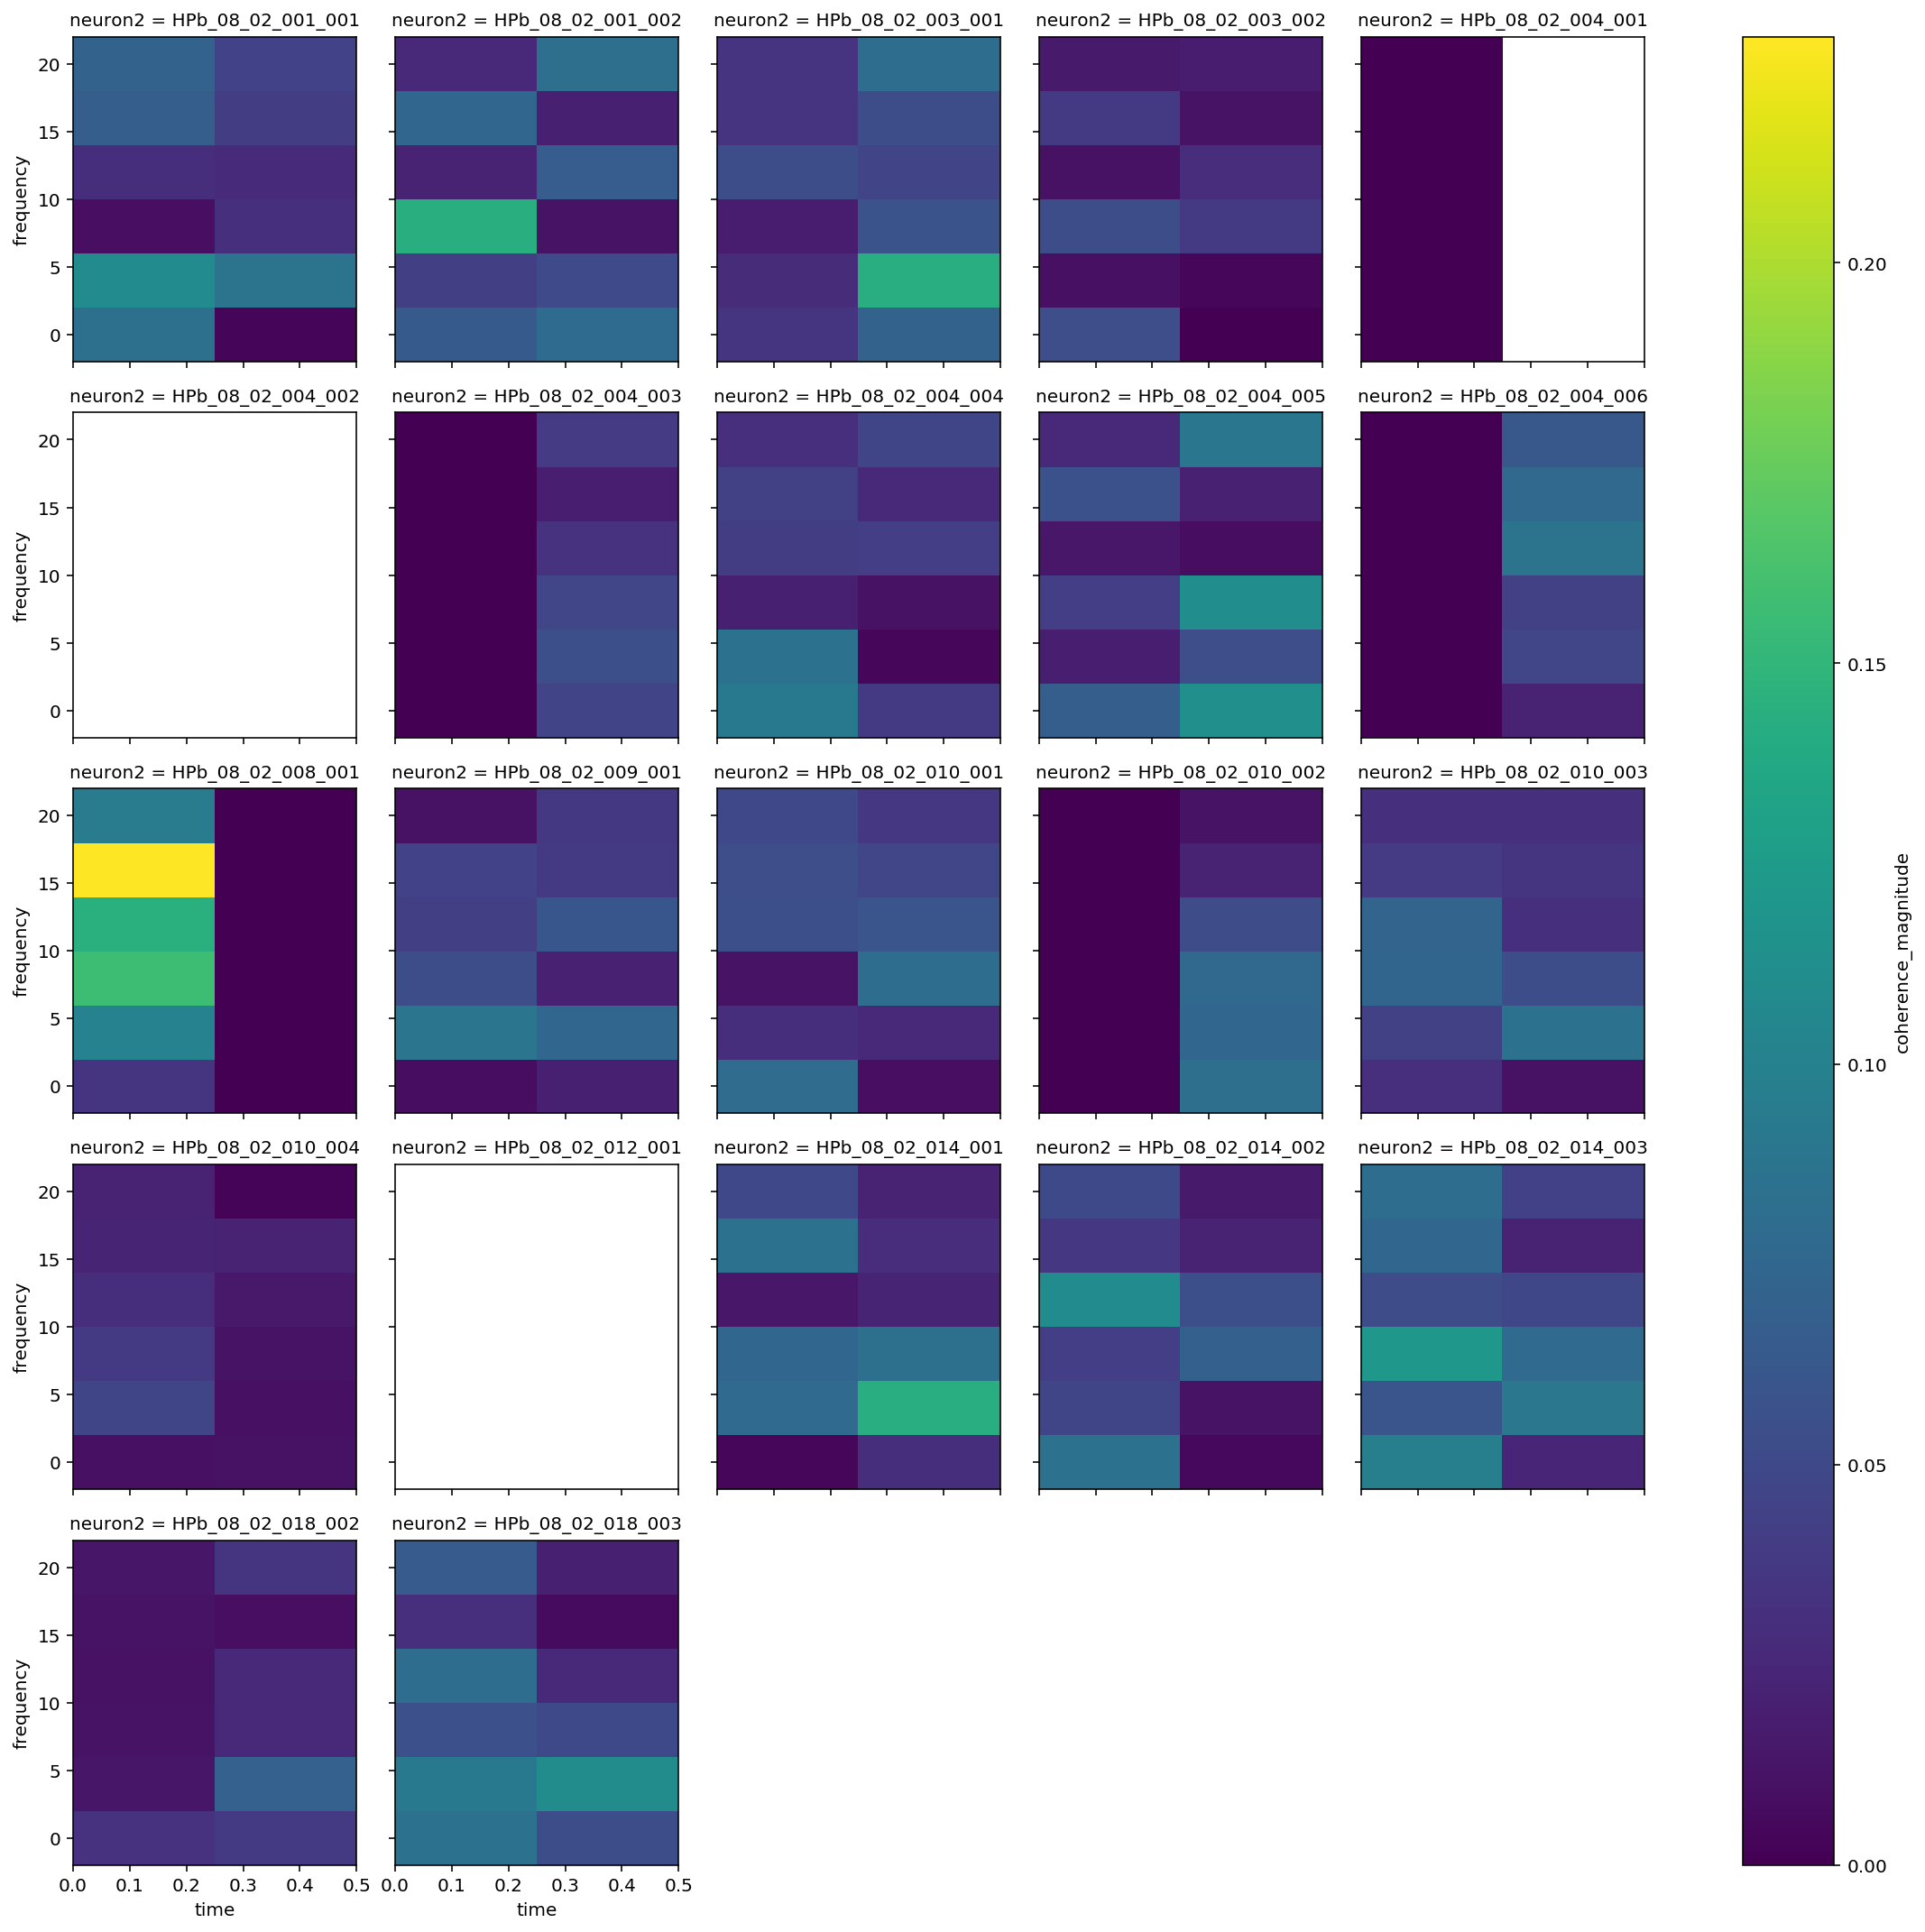

In [26]:
data.sel(neuron1='HPb_08_02_012_001',
         frequency=slice(0, 20)).coherence_magnitude.plot(x='time', y='frequency', col='neuron2', col_wrap=5)

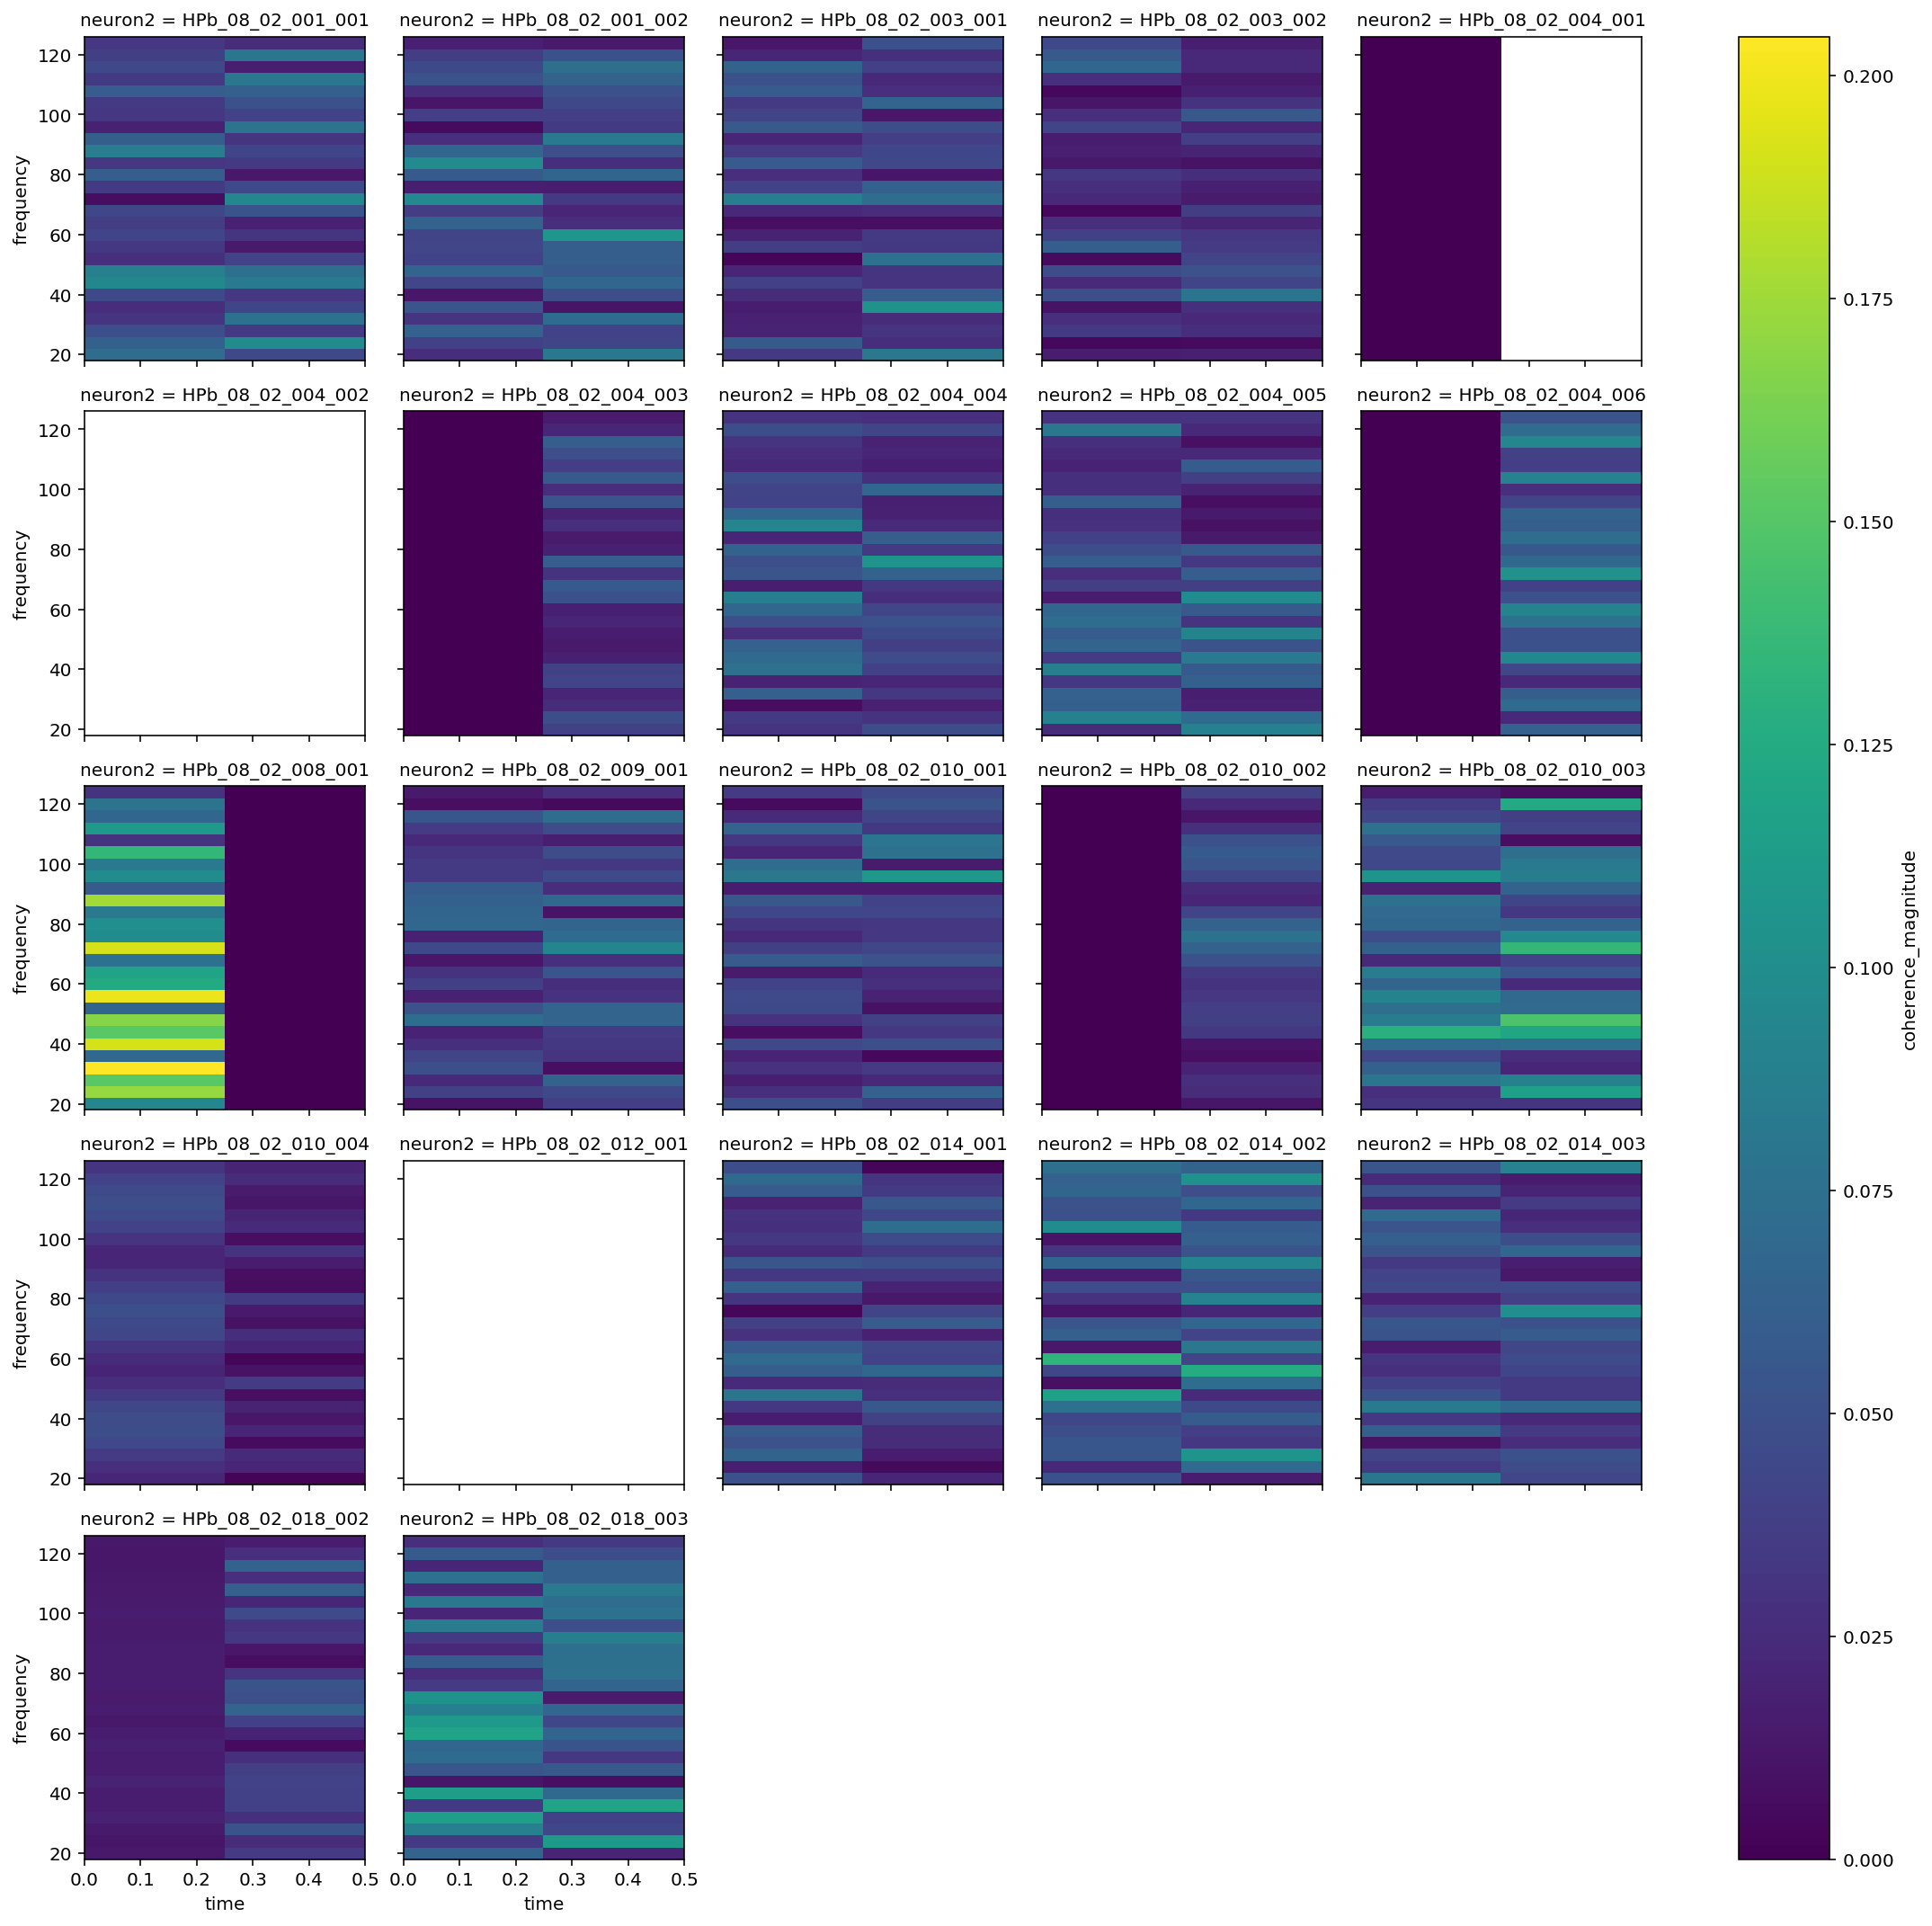

In [27]:
data.sel(neuron1='HPb_08_02_012_001',
         frequency=slice(20, 125)).coherence_magnitude.plot(x='time', y='frequency', col='neuron2', col_wrap=5)

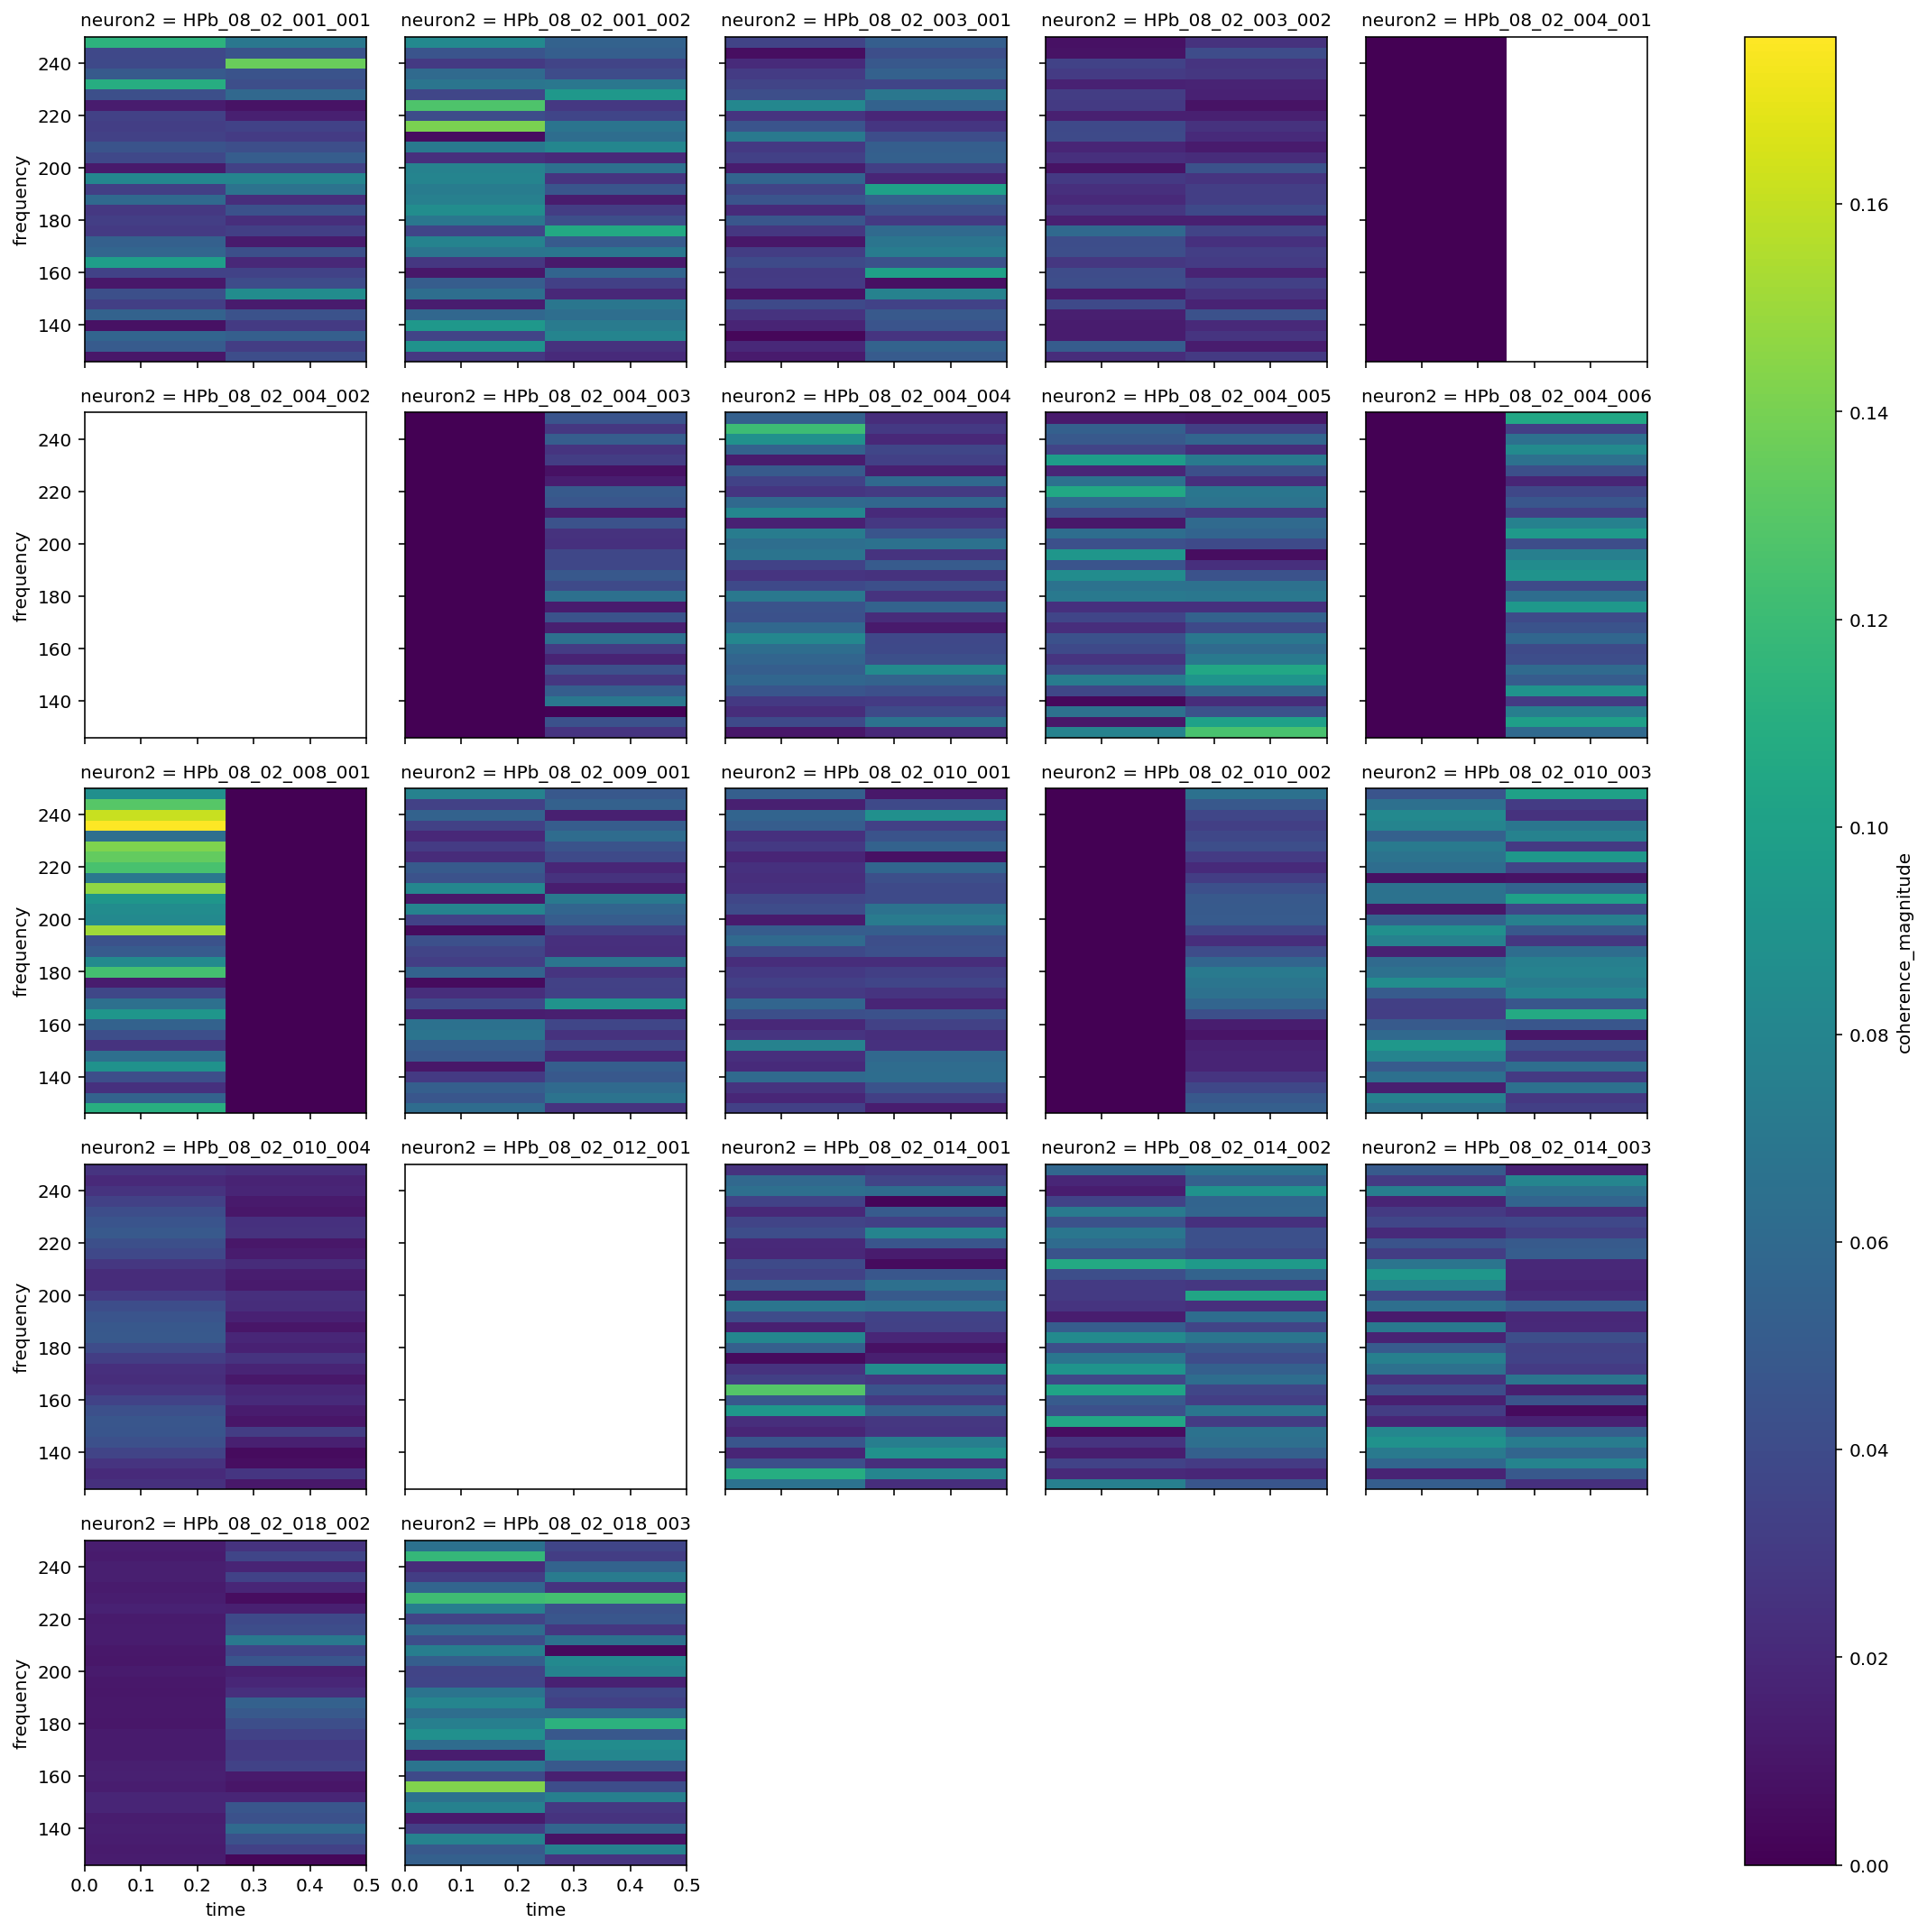

In [28]:
data.sel(neuron1='HPb_08_02_012_001',
         frequency=slice(125, 250)).coherence_magnitude.plot(x='time', y='frequency', col='neuron2', col_wrap=5)

In [29]:
data = xr.open_mfdataset('../Processed-Data/HPb_08_04.nc', group='ripple/spike_spike_coherence')
data

<xarray.Dataset>
Dimensions:               (frequency: 188, neuron1: 20, neuron2: 20, time: 2)
Coordinates:
  * time                  (time) float64 0.125 0.375
  * frequency             (frequency) float64 0.0 4.0 8.0 12.0 16.0 20.0 ...
  * neuron1               (neuron1) object 'HPb_08_04_001_001' ...
  * neuron2               (neuron2) object 'HPb_08_04_001_001' ...
Data variables:
    coherence_magnitude   (time, frequency, neuron1, neuron2) float64 dask.array<shape=(2, 188, 20, 20), chunksize=(2, 188, 20, 20)>
    coherence_difference  (frequency, neuron1, neuron2) float64 dask.array<shape=(188, 20, 20), chunksize=(188, 20, 20)>

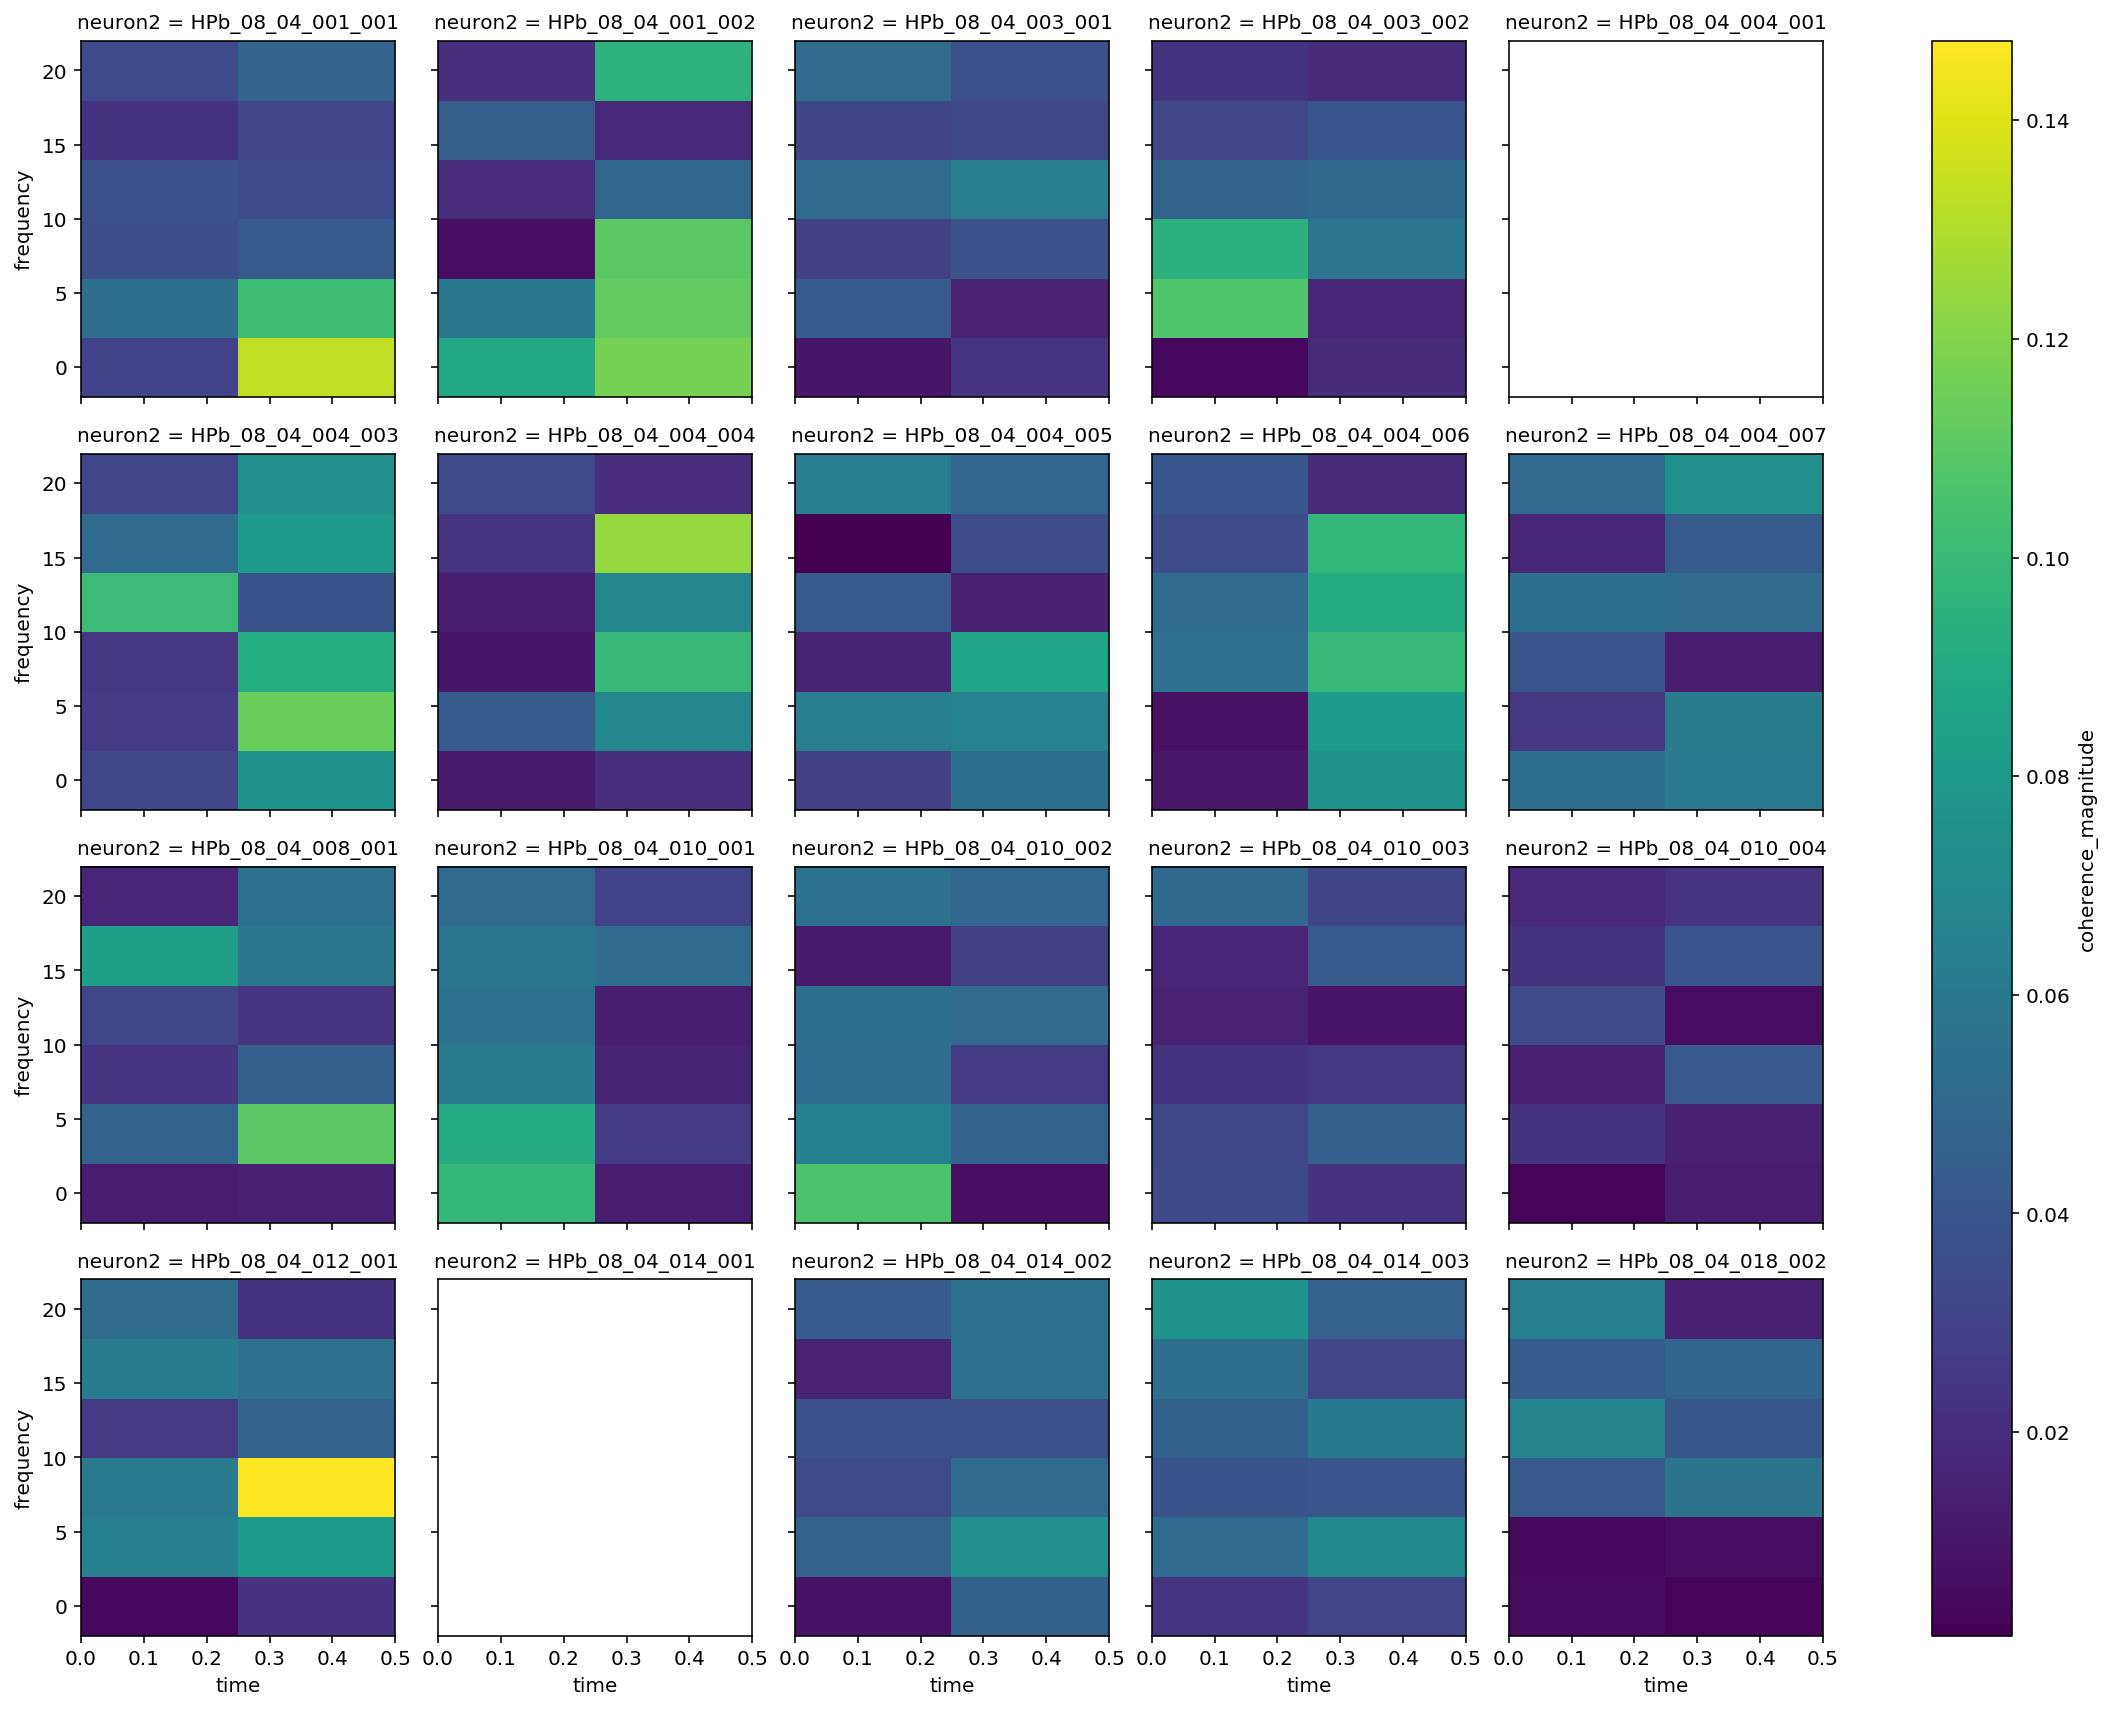

In [30]:
data.sel(neuron1='HPb_08_04_014_001',
         frequency=slice(0, 20)).coherence_magnitude.plot(x='time', y='frequency', col='neuron2', col_wrap=5)

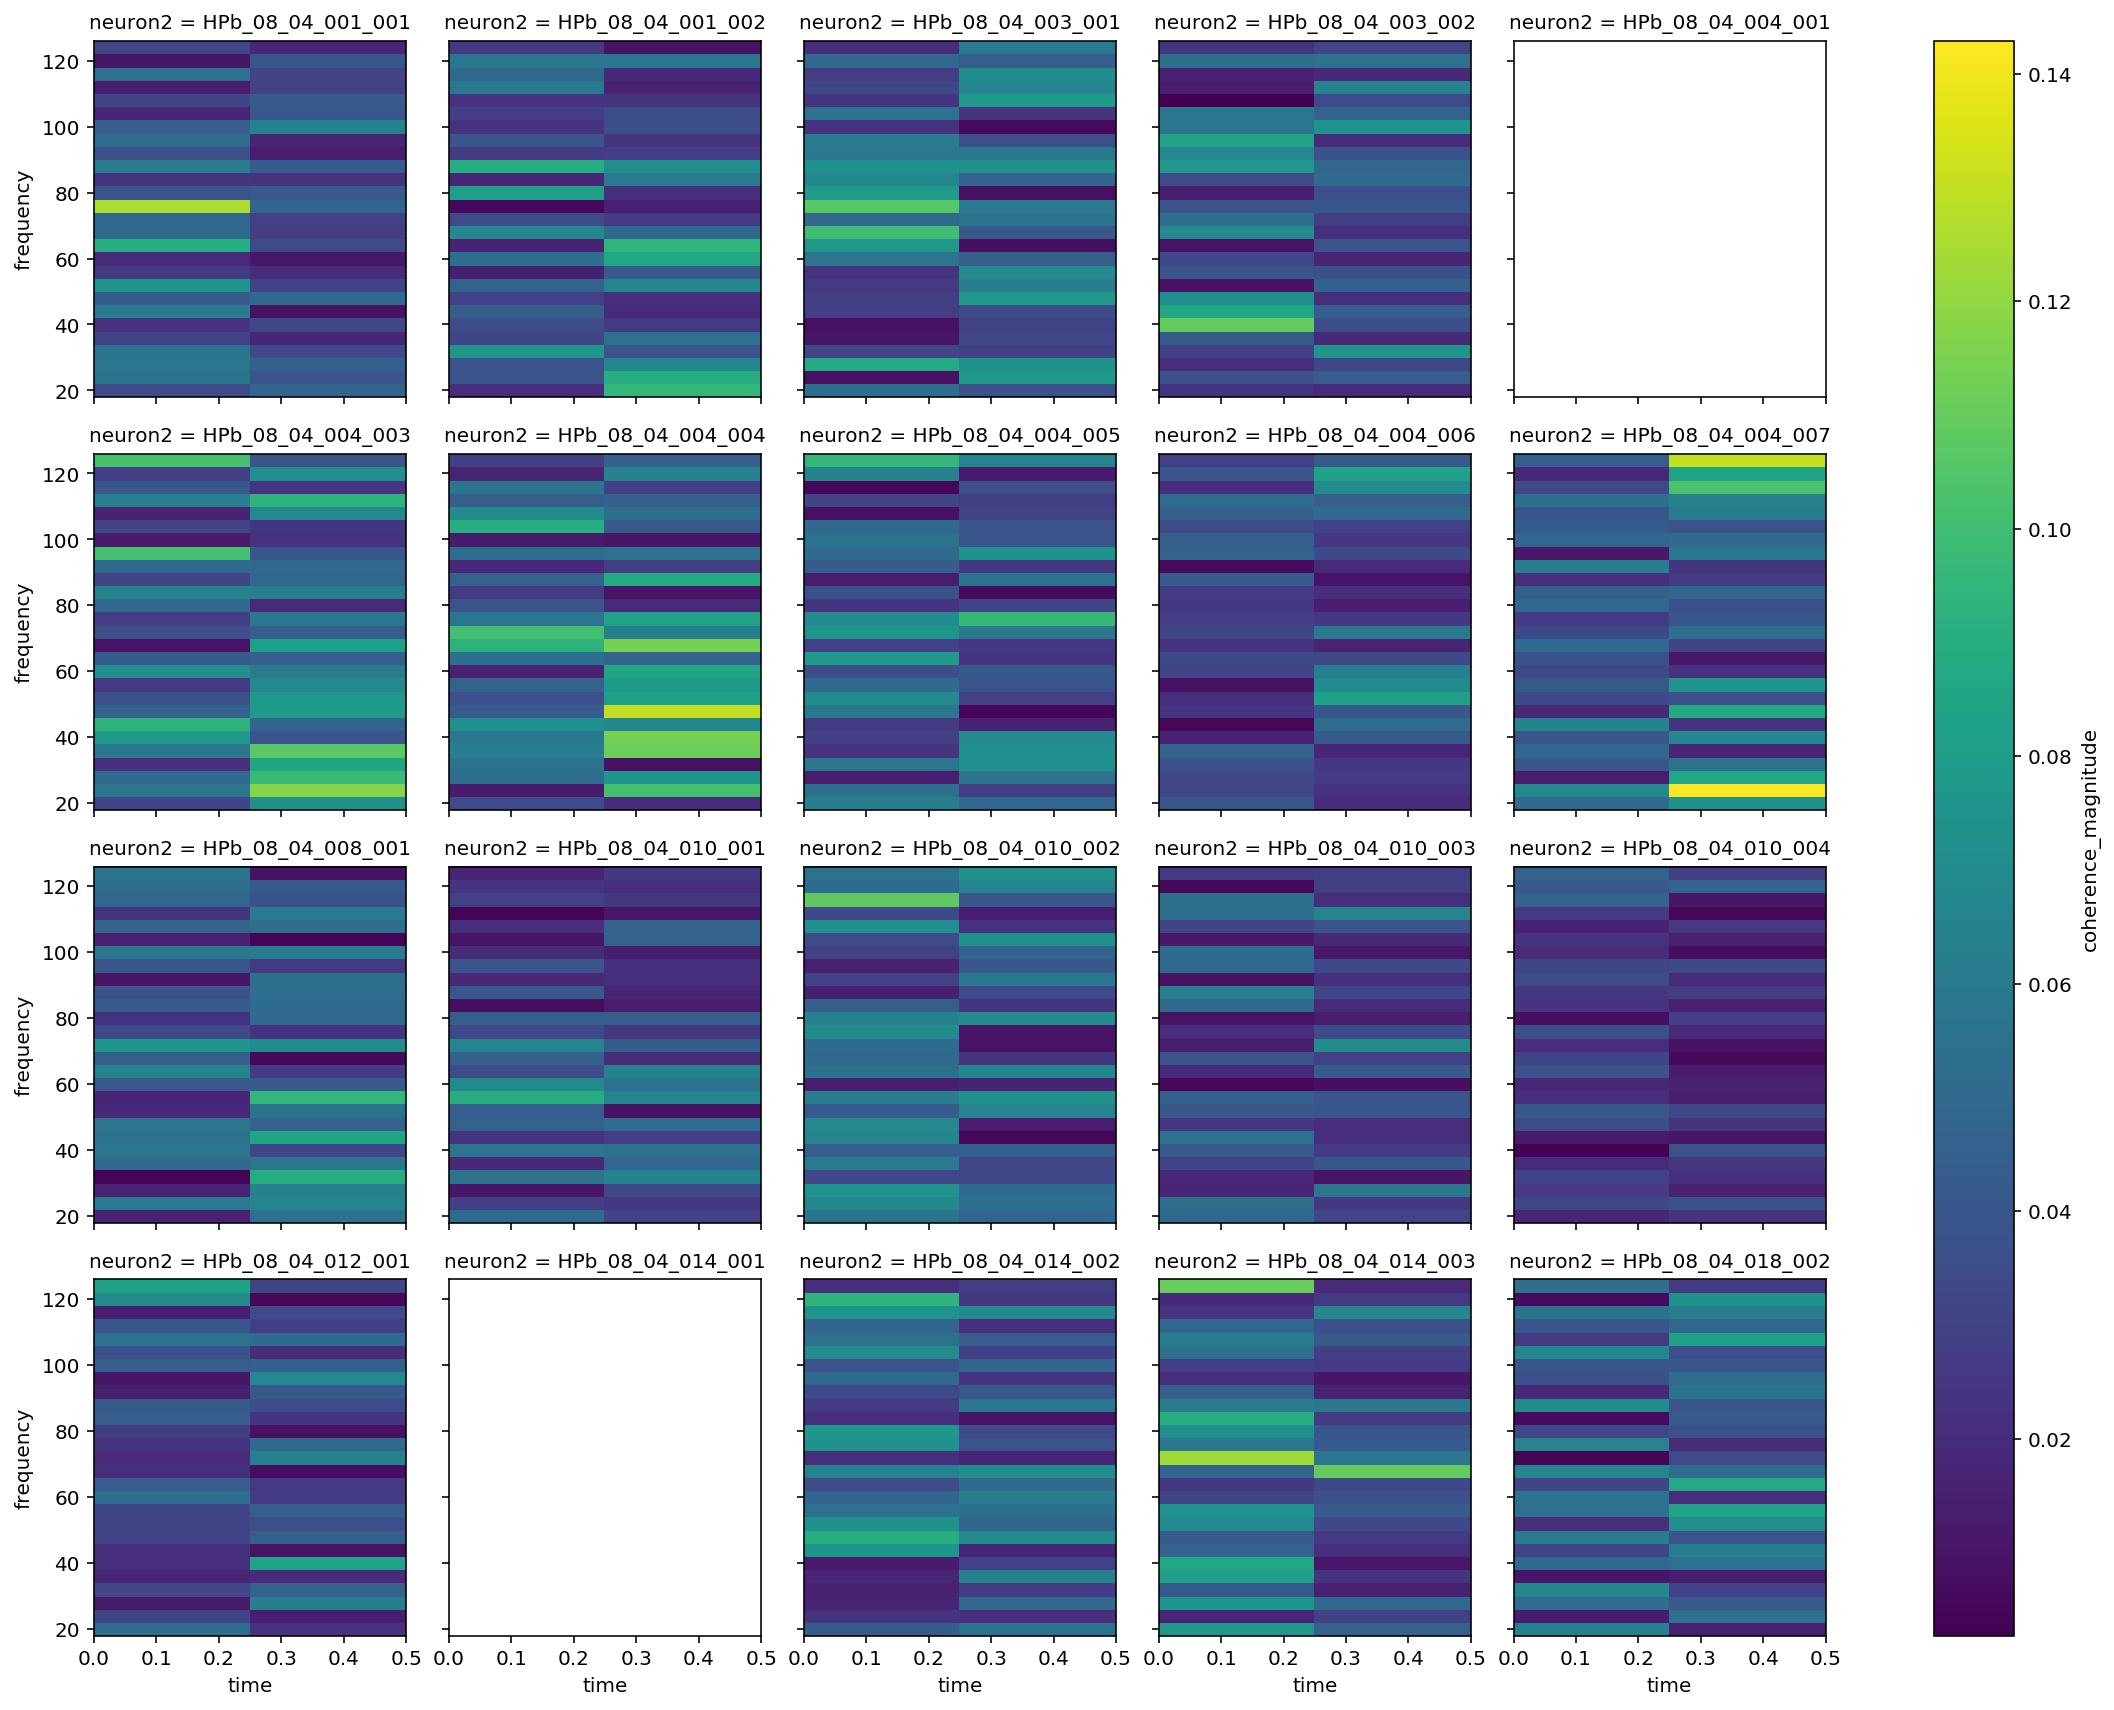

In [31]:
data.sel(neuron1='HPb_08_04_014_001',
         frequency=slice(20, 125)).coherence_magnitude.plot(x='time', y='frequency', col='neuron2', col_wrap=5)

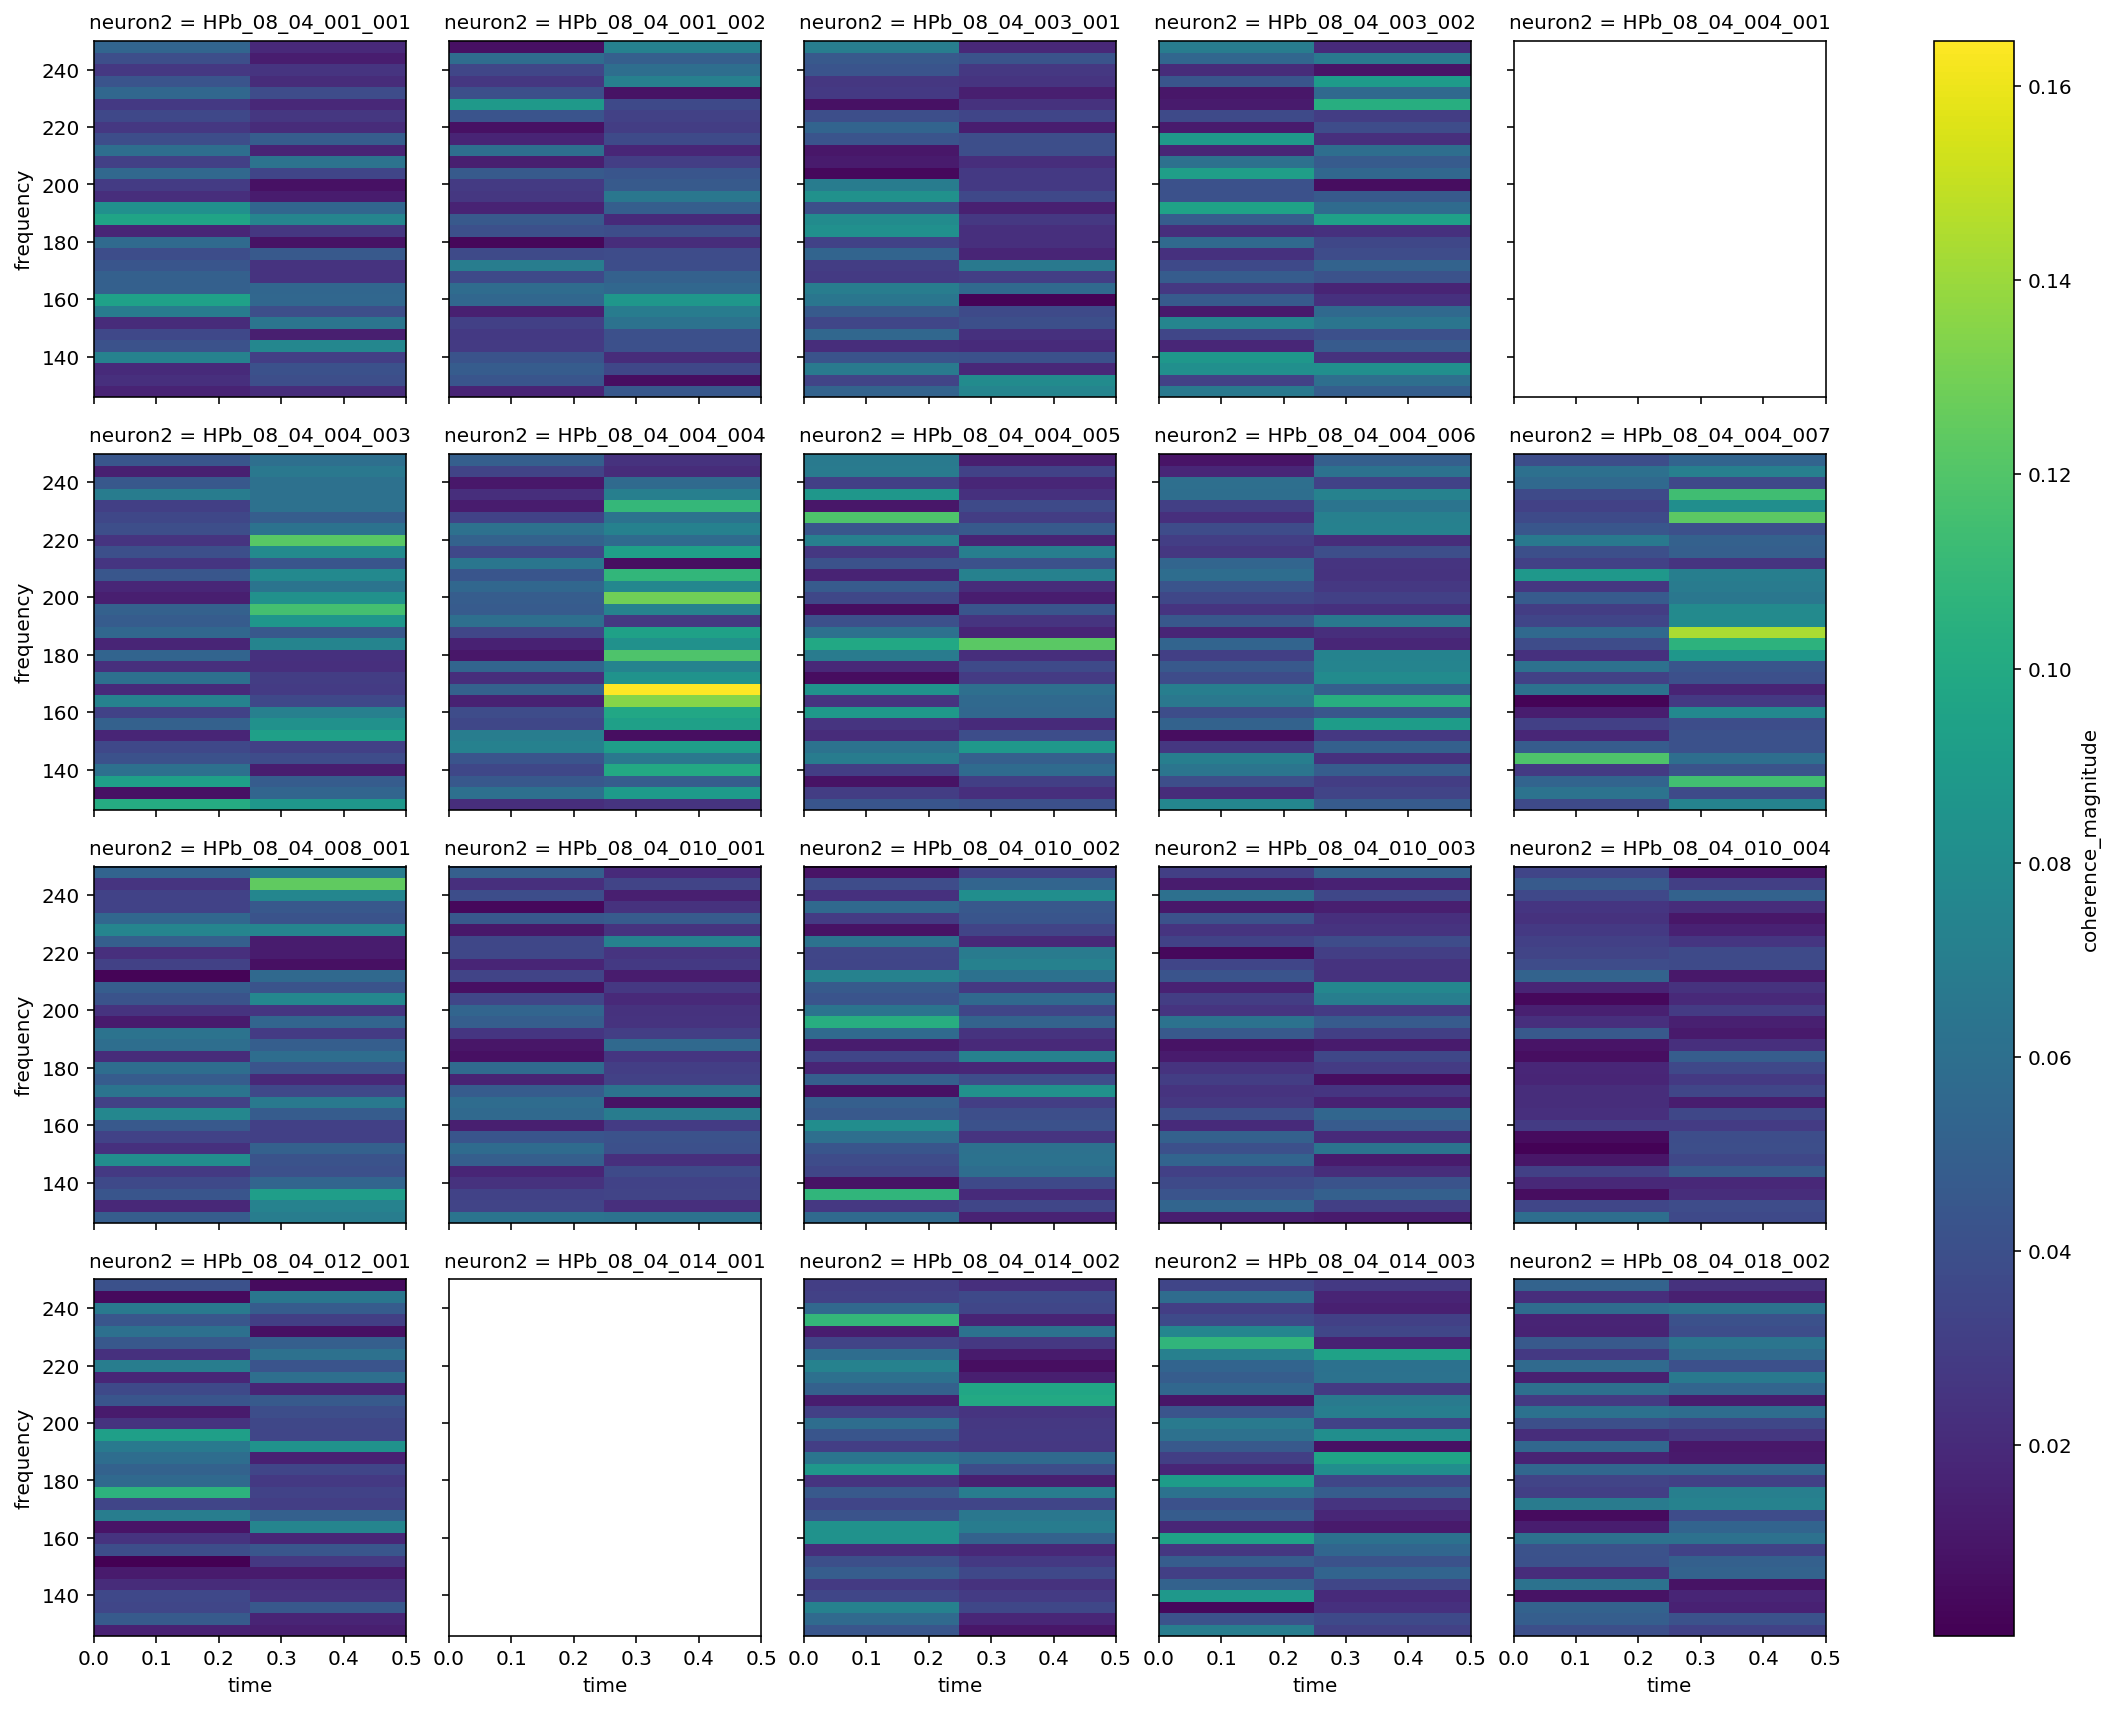

In [32]:
data.sel(neuron1='HPb_08_04_014_001',
         frequency=slice(125, 250)).coherence_magnitude.plot(x='time', y='frequency', col='neuron2', col_wrap=5)